# Temoa Simulation Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data_parser import get_output_files, make_capacity_plots, make_emissions_plots
from data_parser import get_scenario_name, parse_datalines, create_dataframe, create_column
from data_parser import data_by_tech, data_by_variable, data_by_year
from data_parser import variables, time_horizon, get_total

## Business As Usual

* Nuclear reactors shutdown prematurely.
* There is no constraint on carbon or other greenhouse gas emissions.

In [2]:
file_list = get_output_files()
file_list.sort()
file_list

['./data_files/BAU_IL_bau_model/bau_OutputLog.log',
 './data_files/SD2_IL_SD2_model/SD2_OutputLog.log',
 './data_files/SD3_IL_SD3_model/SD3_OutputLog.log',
 './data_files/SD4_IL_SD4_model/SD4_OutputLog.log',
 './data_files/SD5_IL_SD5_model/SD5_OutputLog.log',
 './data_files/SD6_IL_SD6_model/SD6_OutputLog.log']

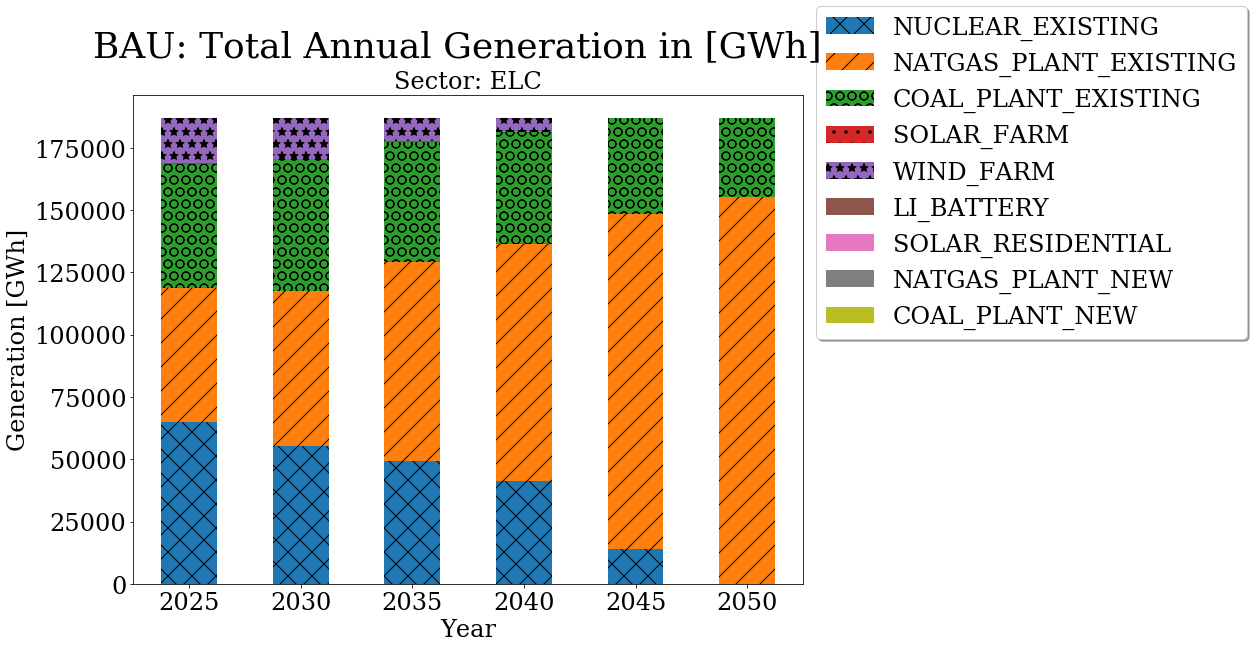

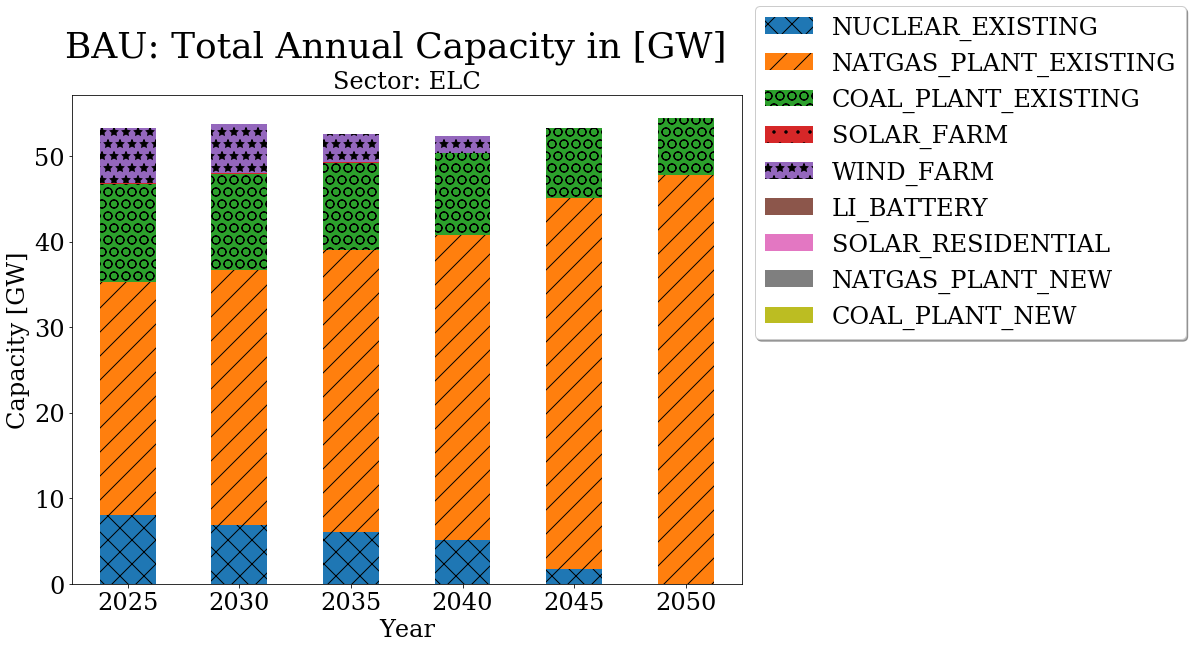

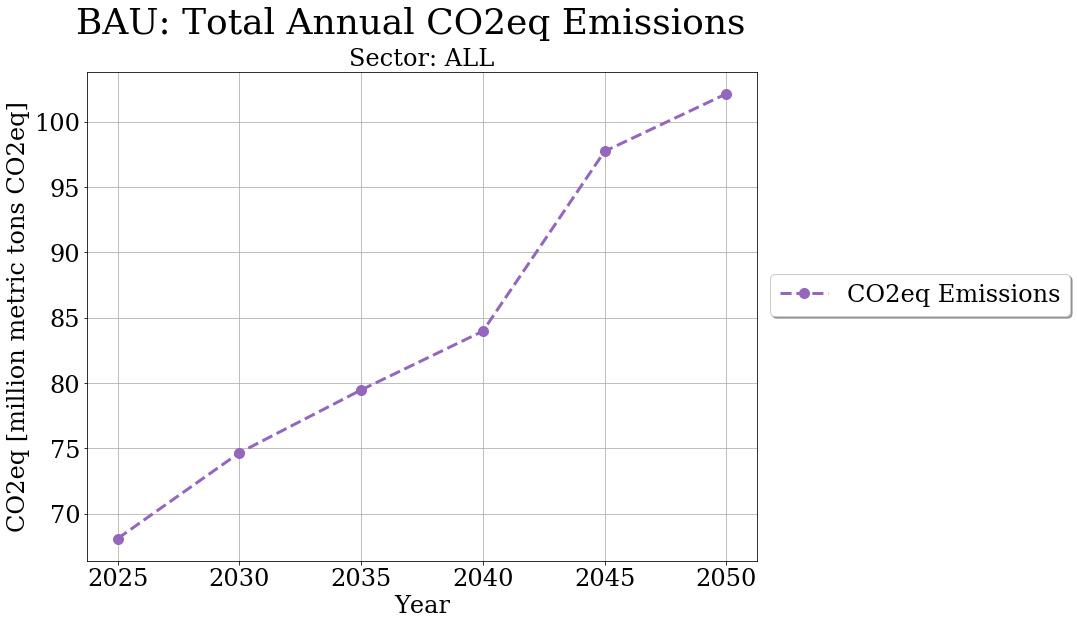

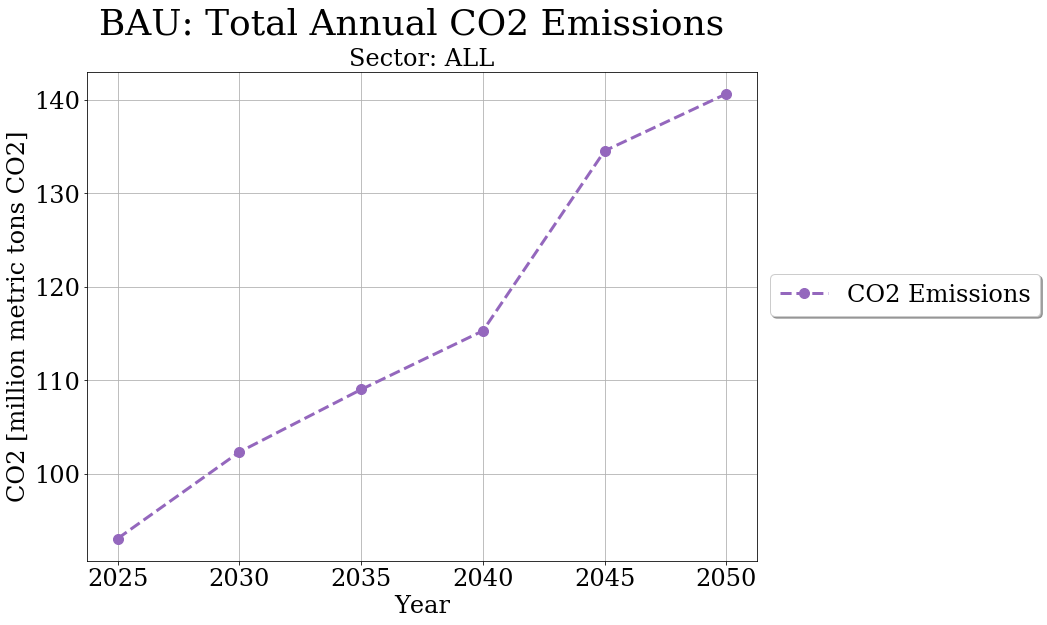

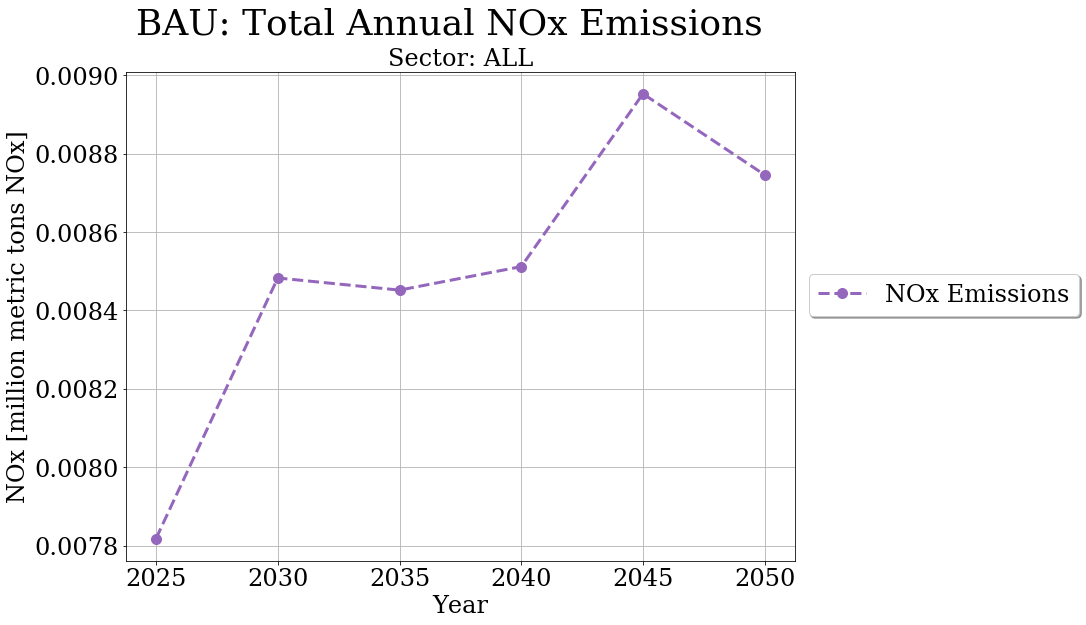

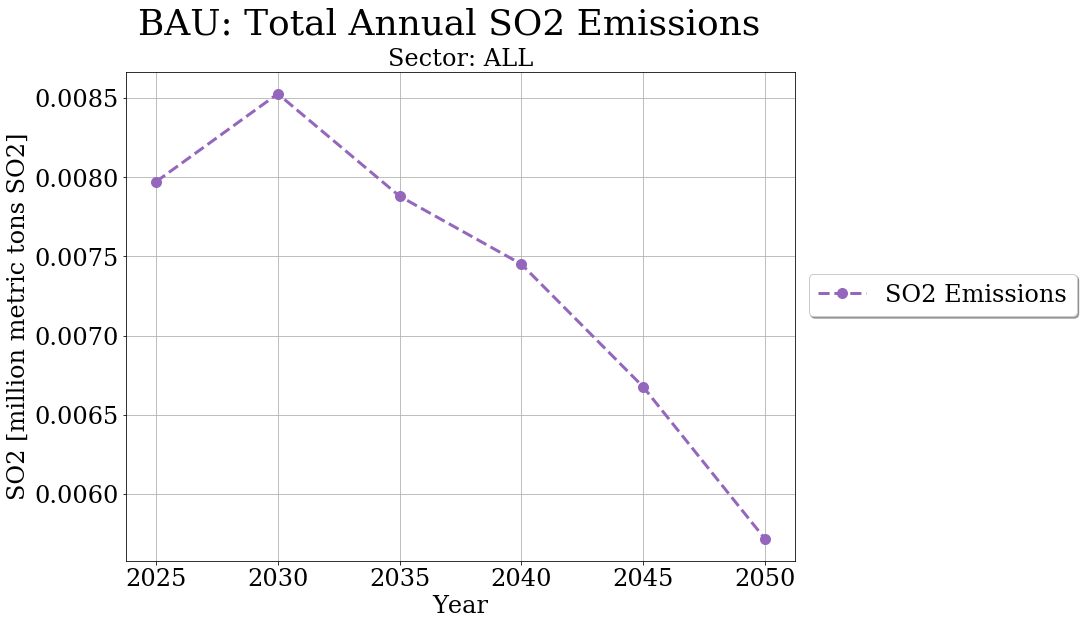

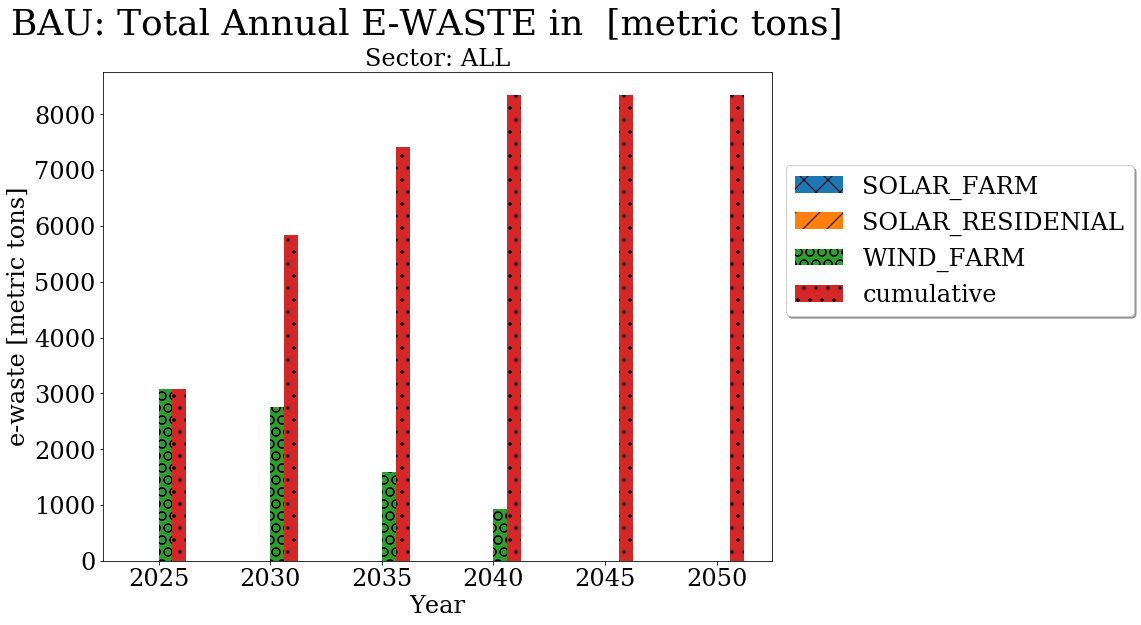

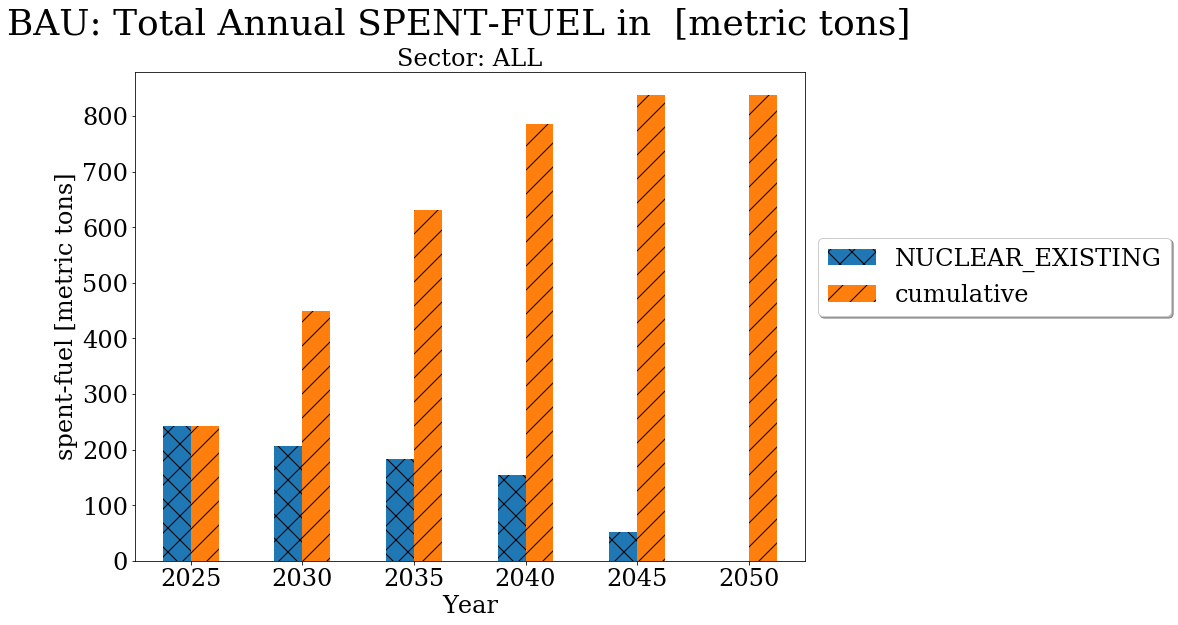

In [3]:
scenario = 'bau'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)        

## Scenario: SD2

* Nuclear Plants Shutdown At the end of their current licenses.
* There is no constraint on carbon emissions

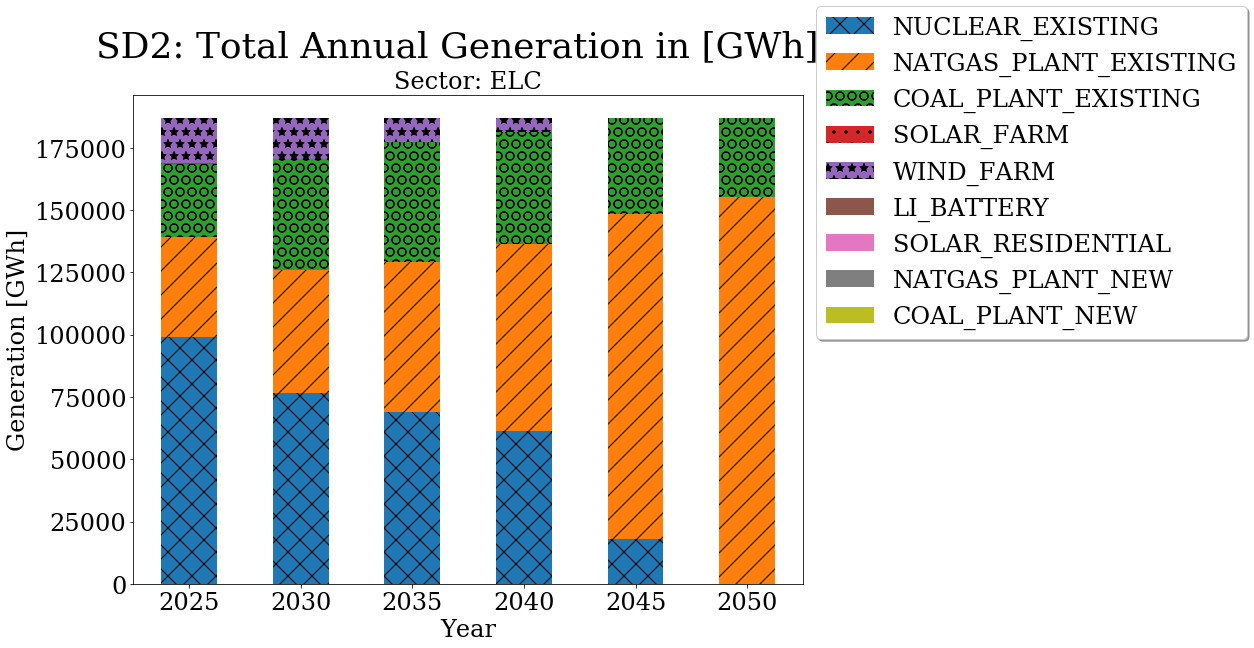

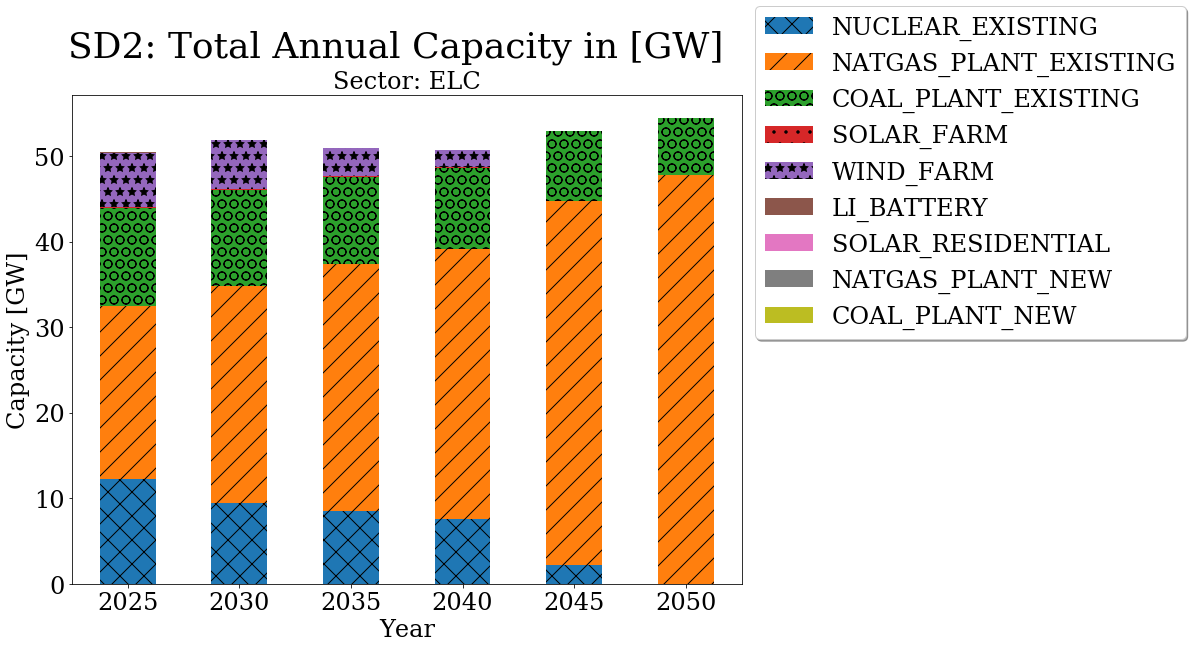

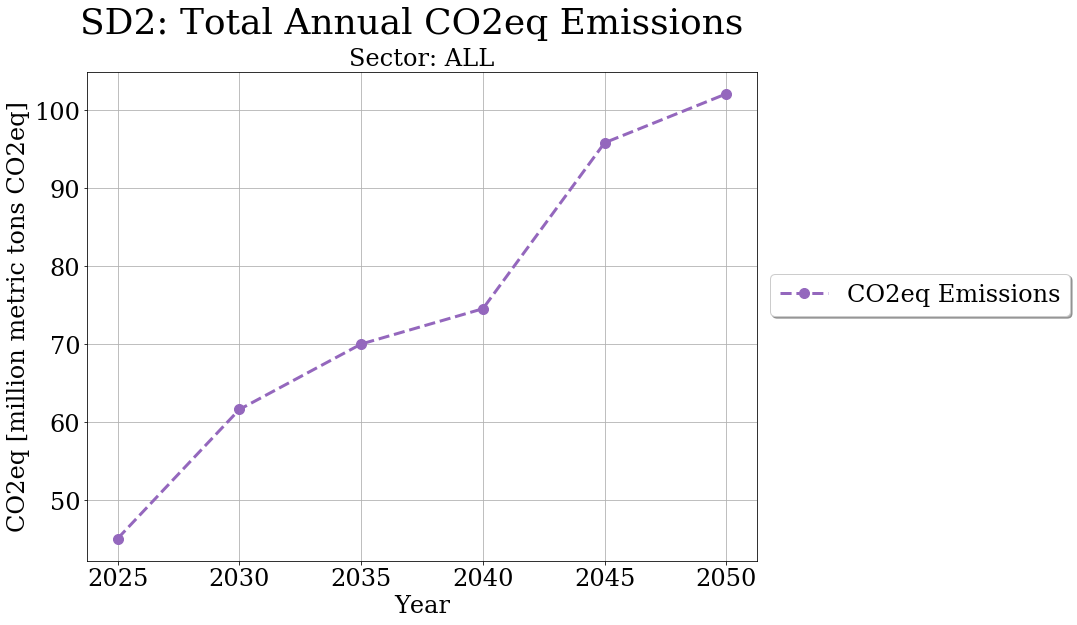

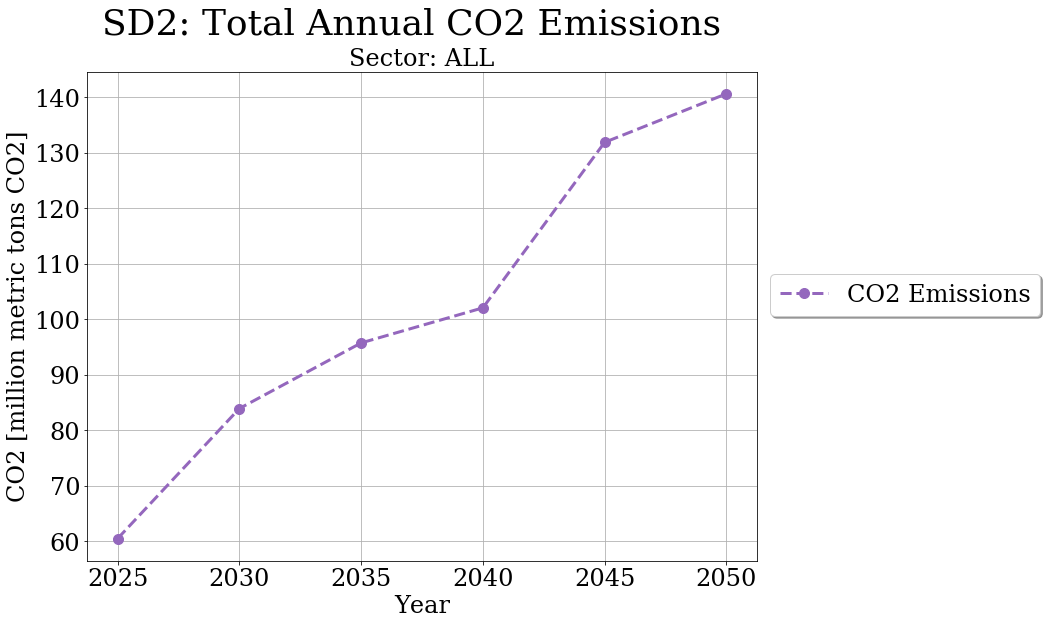

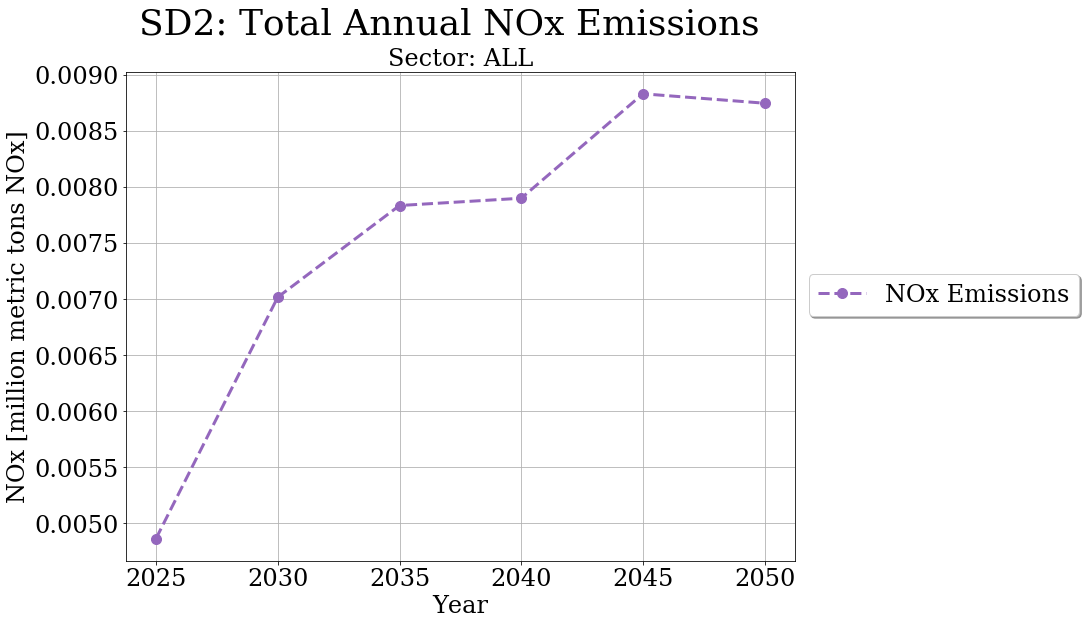

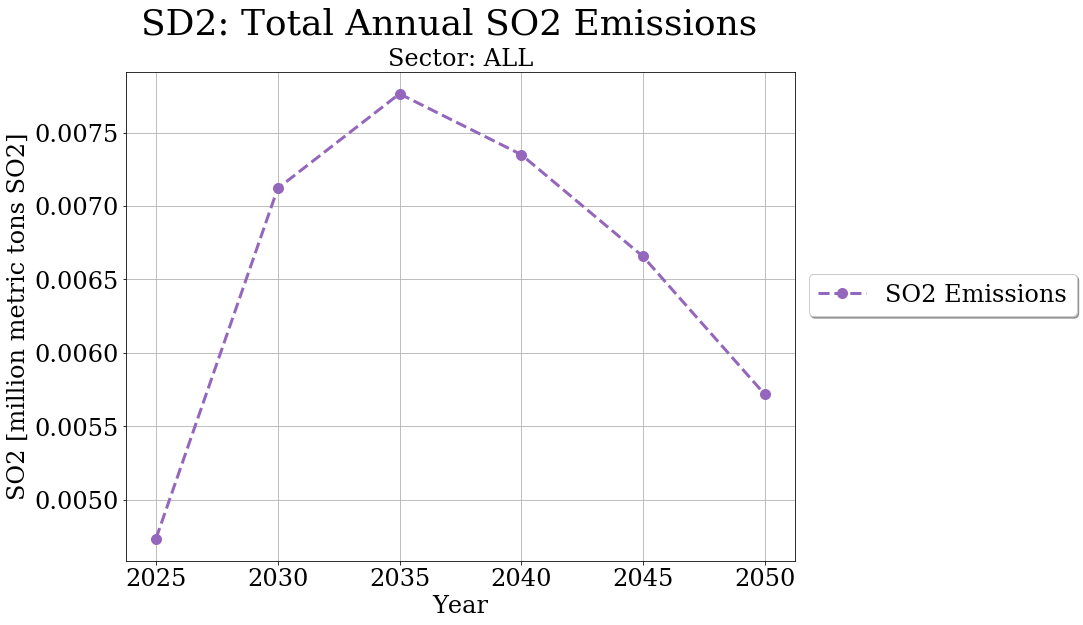

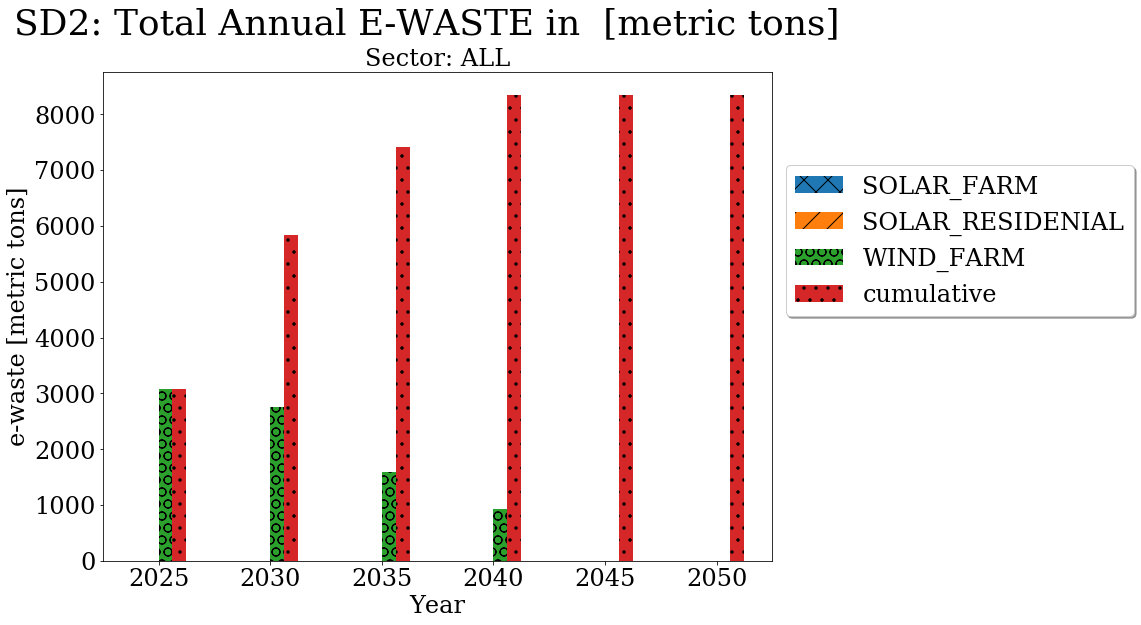

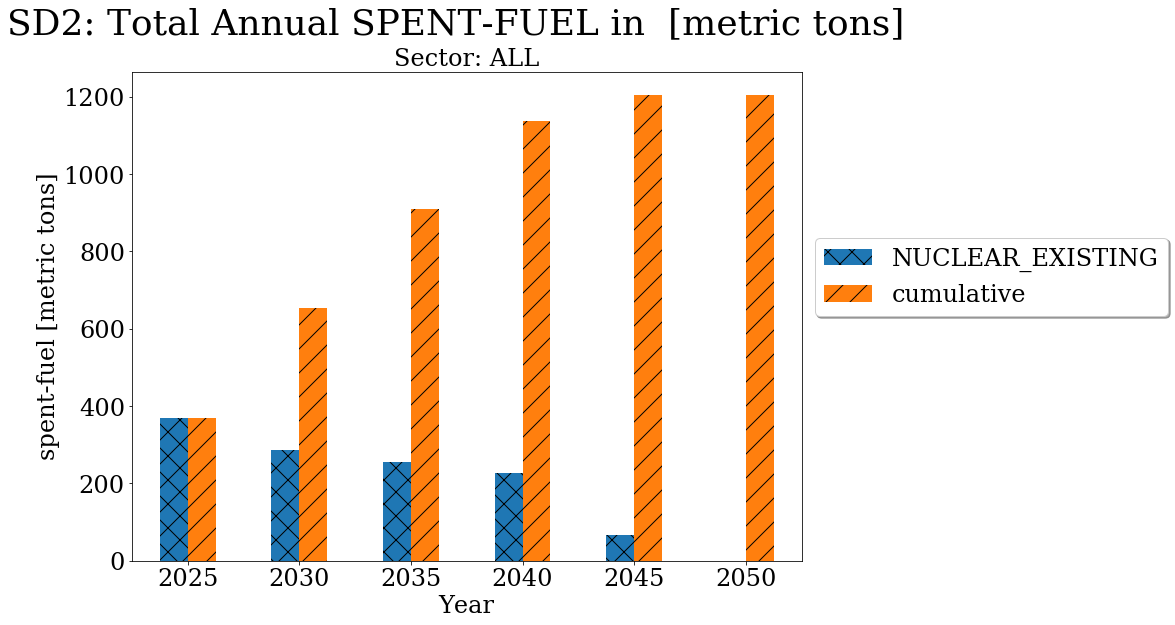

In [4]:
scenario = 'SD2'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)  

## Scenario: SD3

* Nuclear plants remain open through 2050.
* There is no constraint on carbon or other greenhouse gas emissions.

Objective Function Values: 119265.34401 million dollars

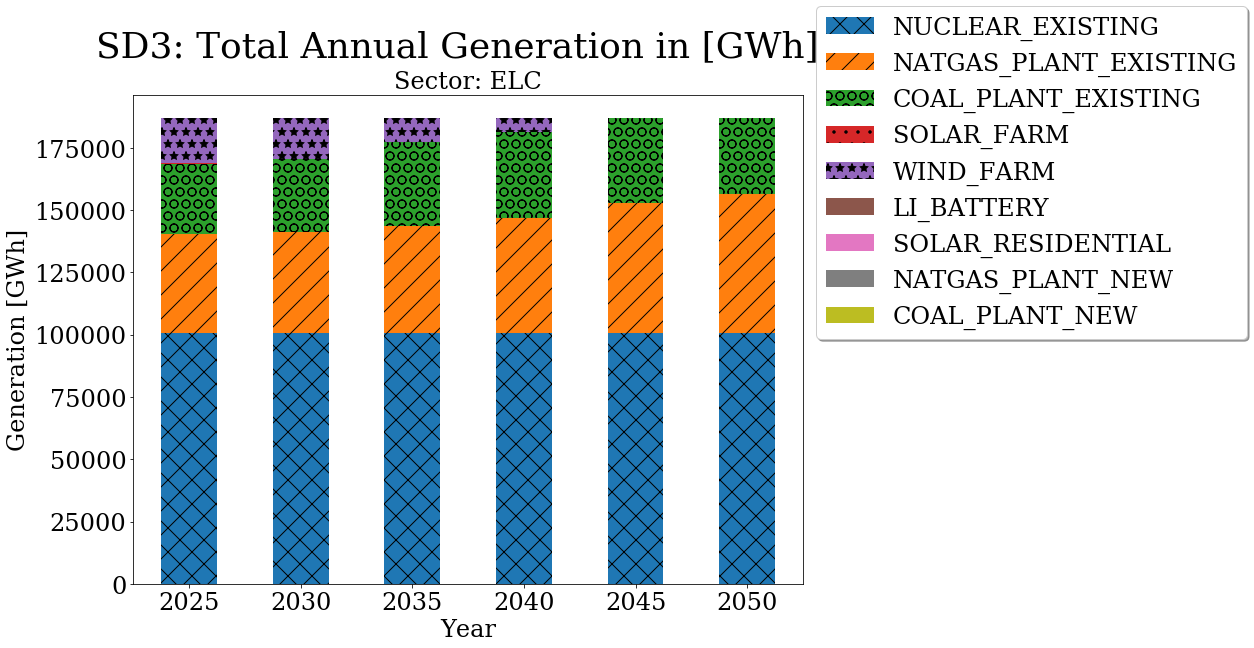

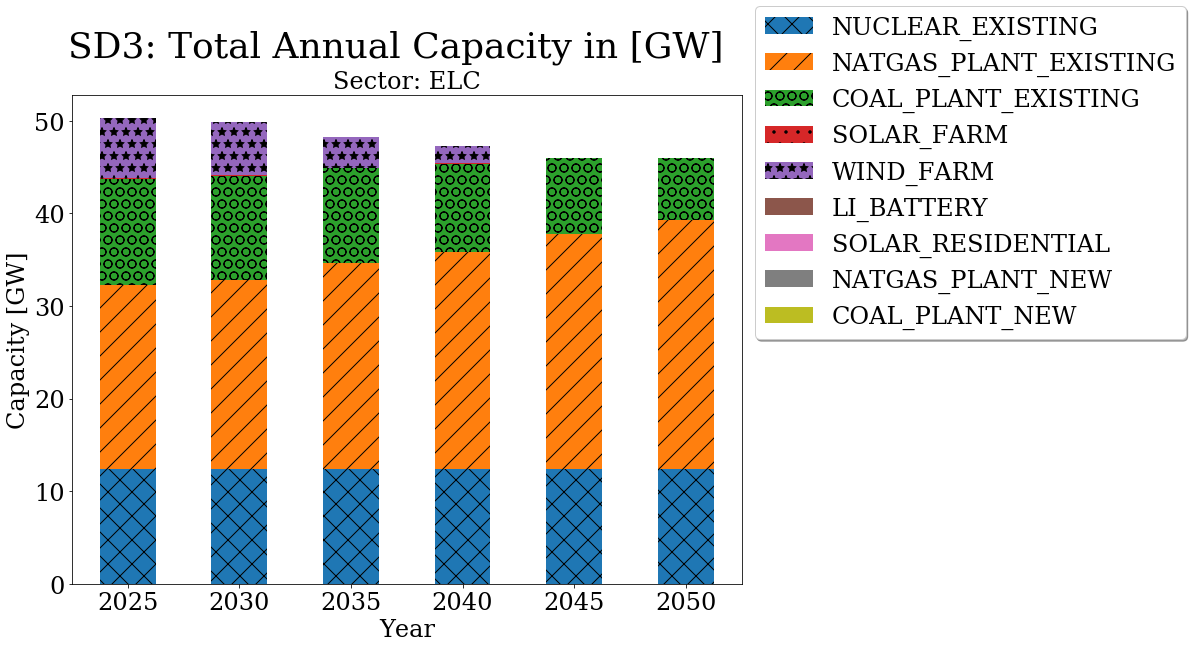

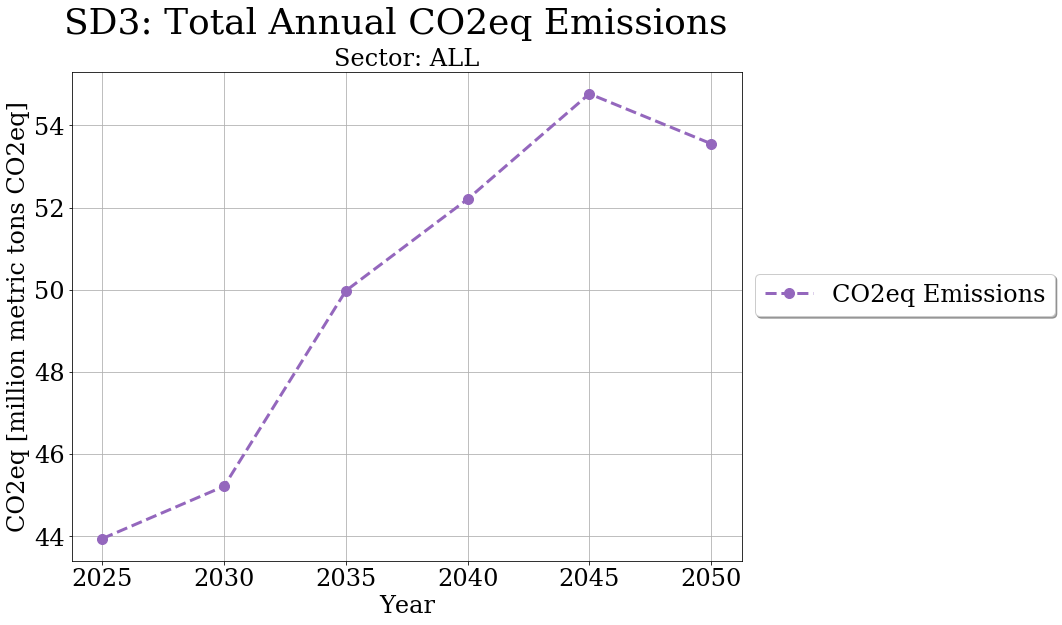

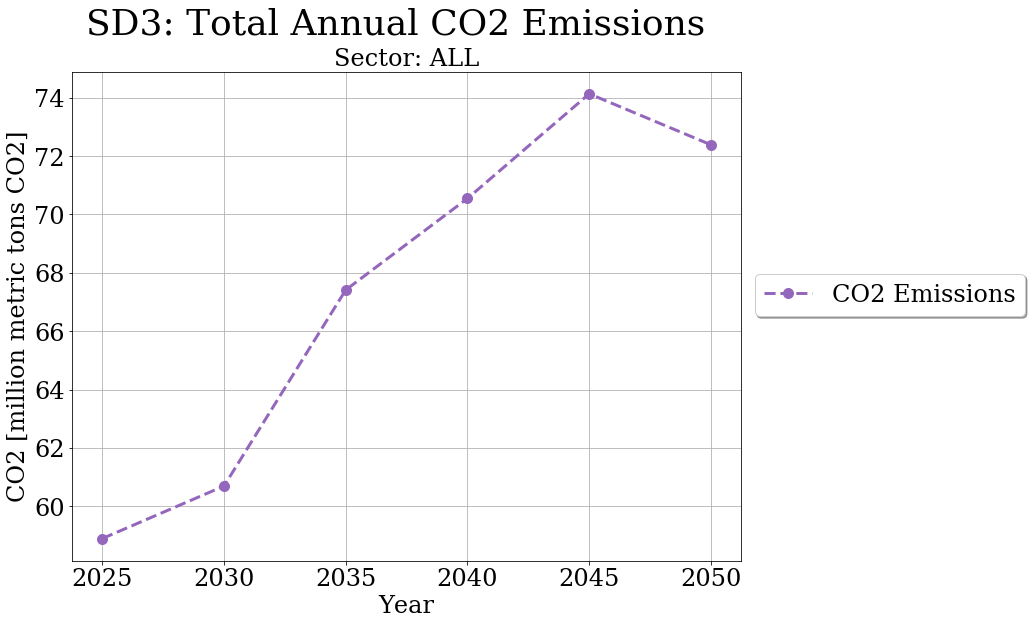

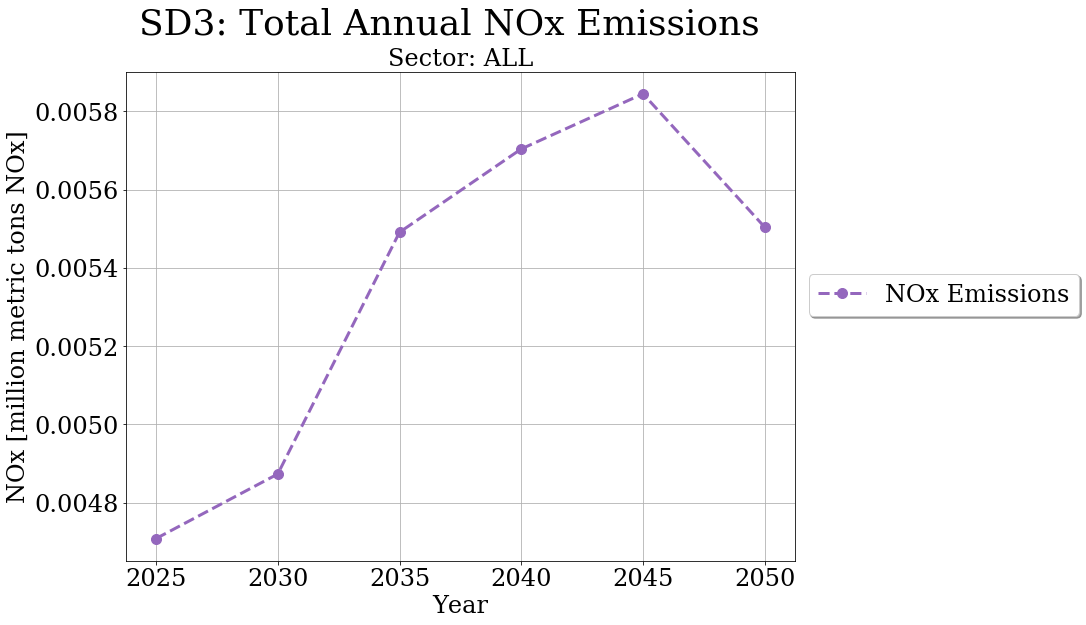

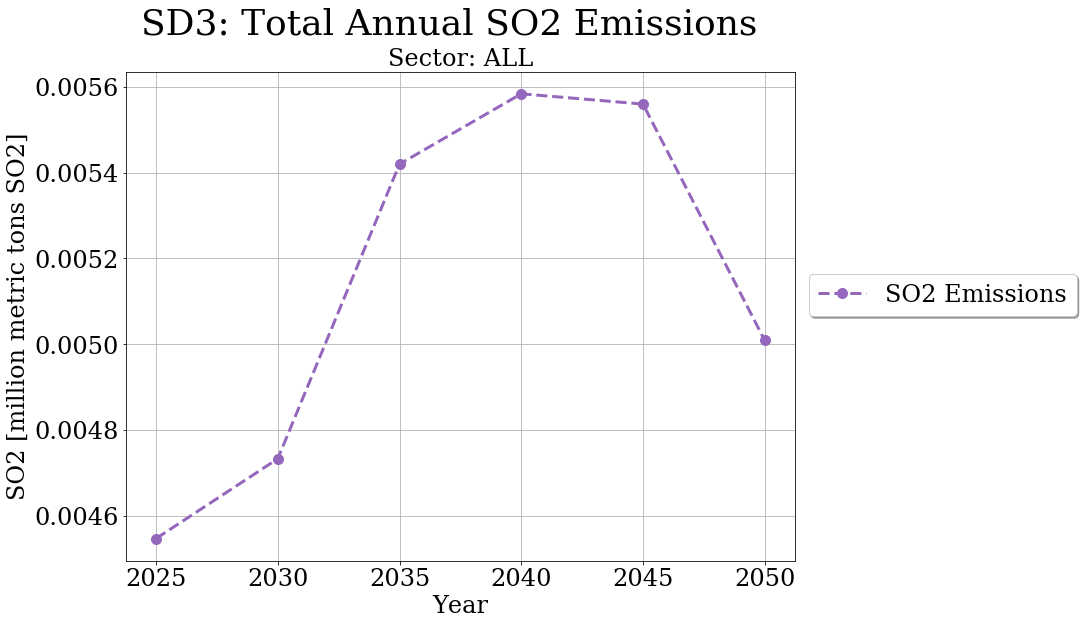

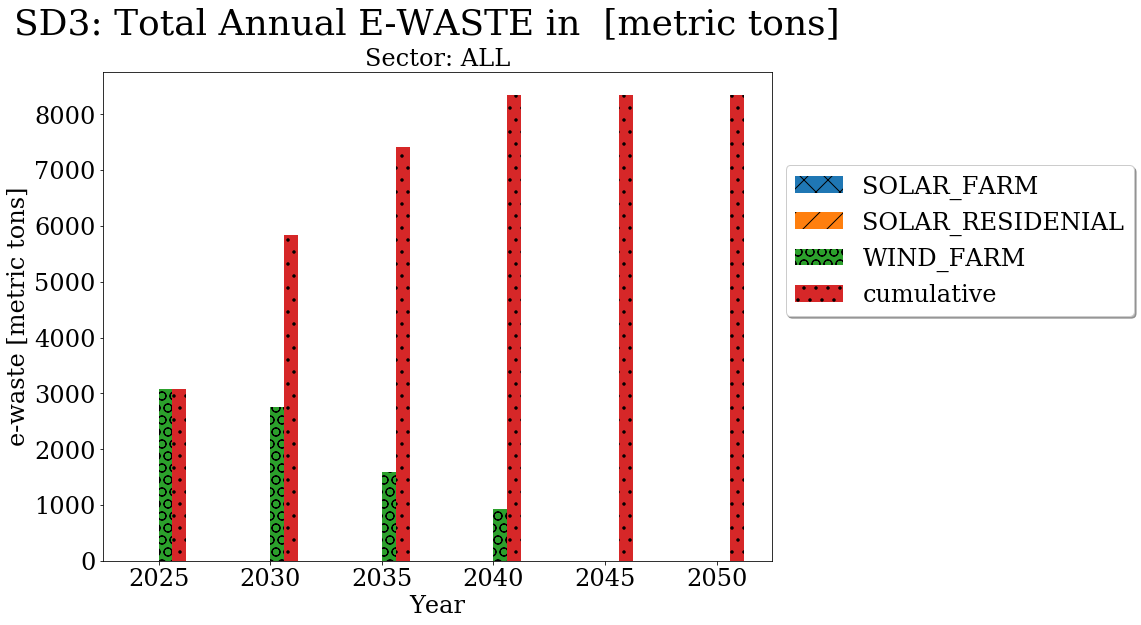

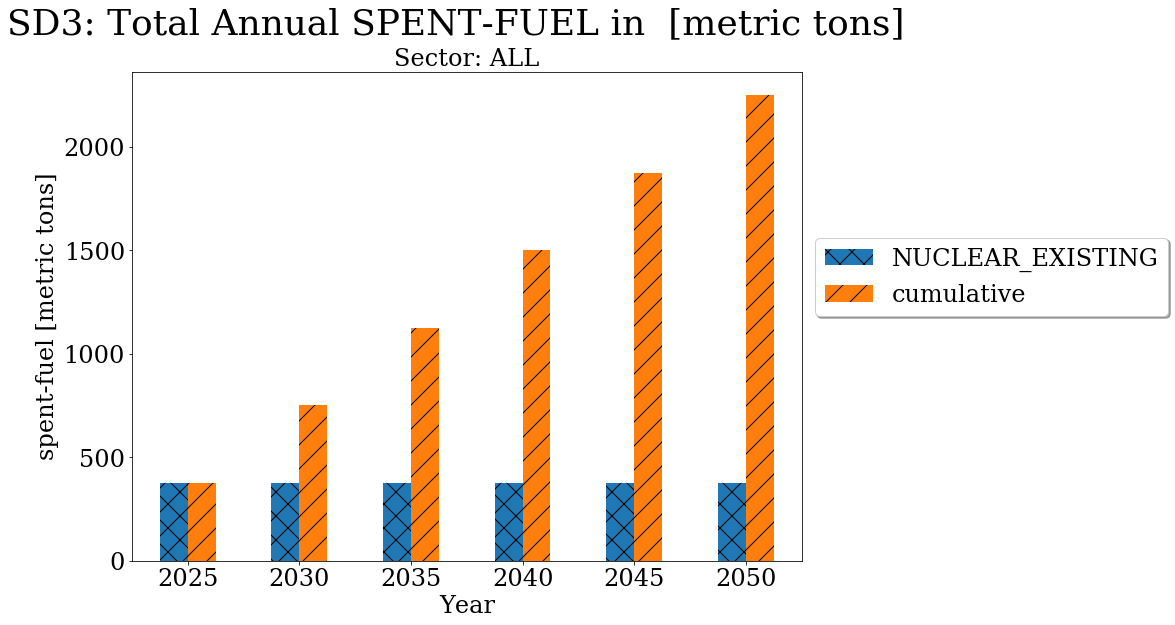

In [5]:
scenario = 'SD3'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)  

## Scenario: SD4

* Nuclear plants shutdown prematurely. 
* Zero carbon emissions allowed by 2030

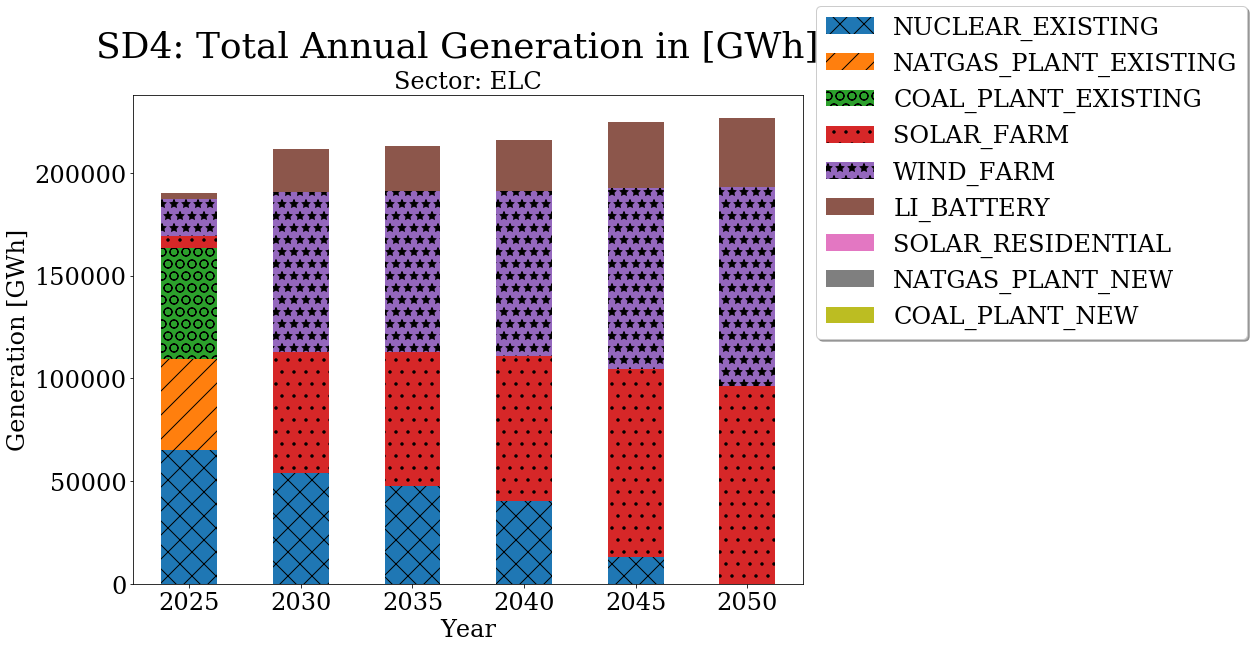

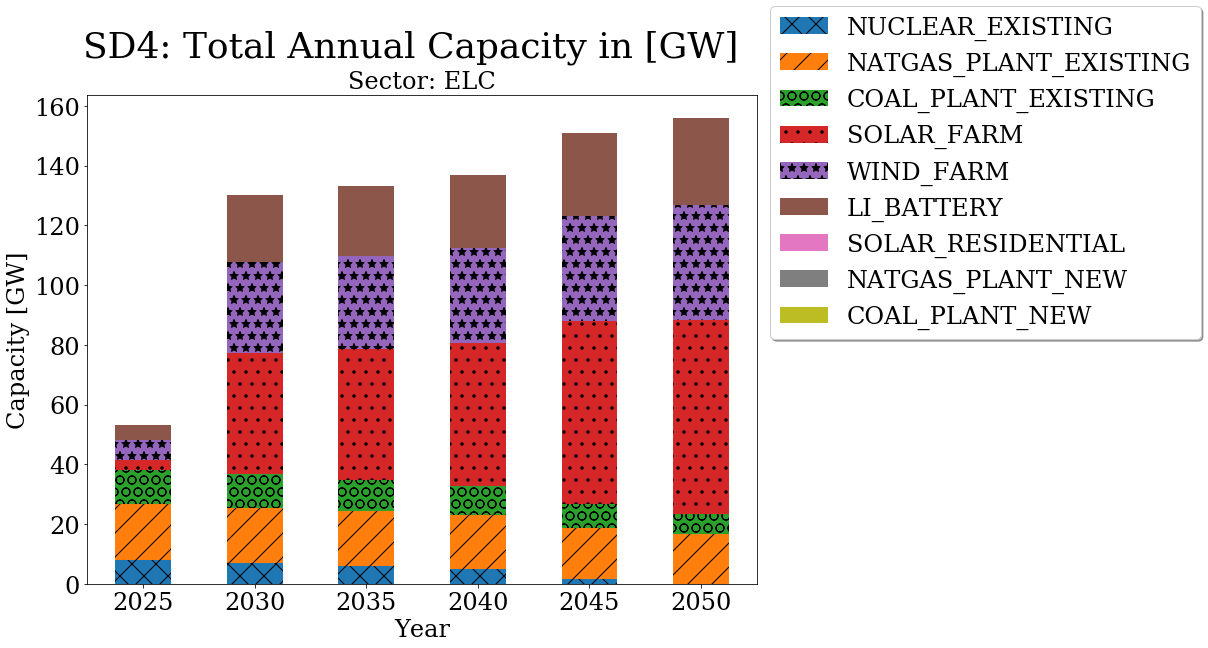

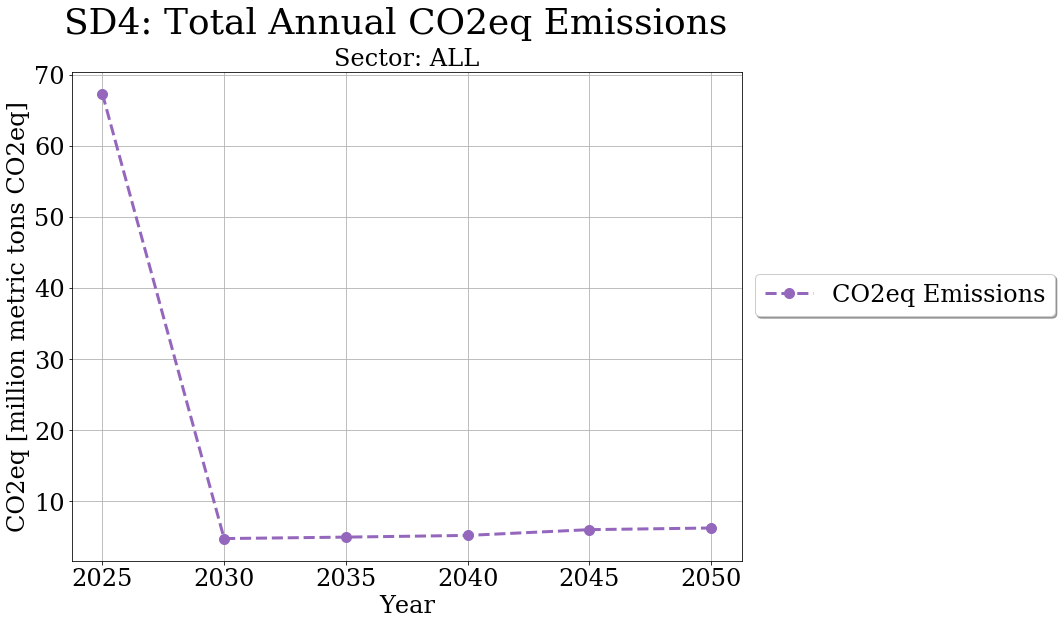

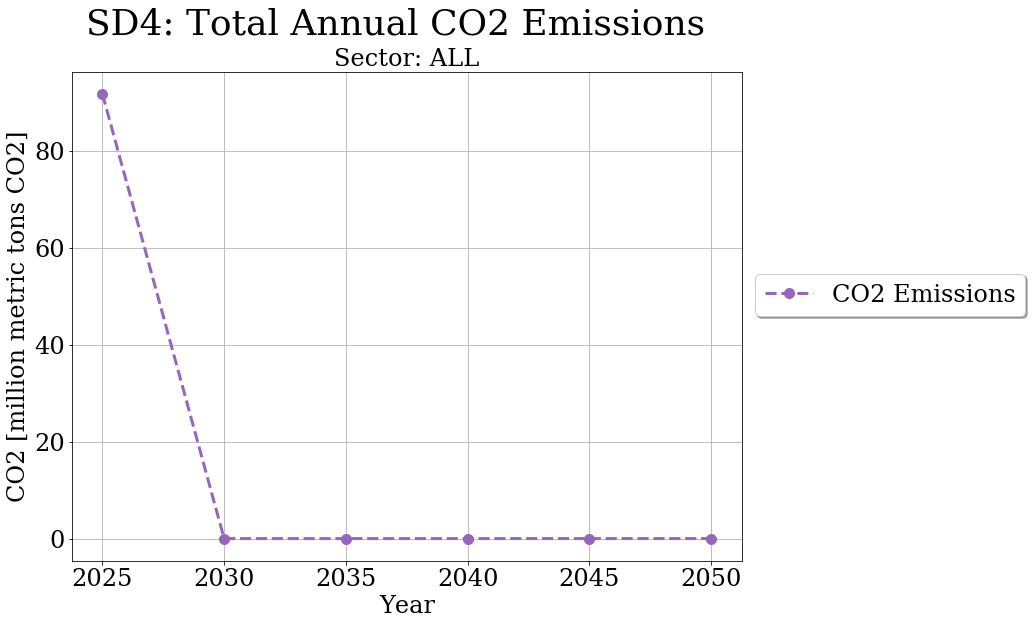

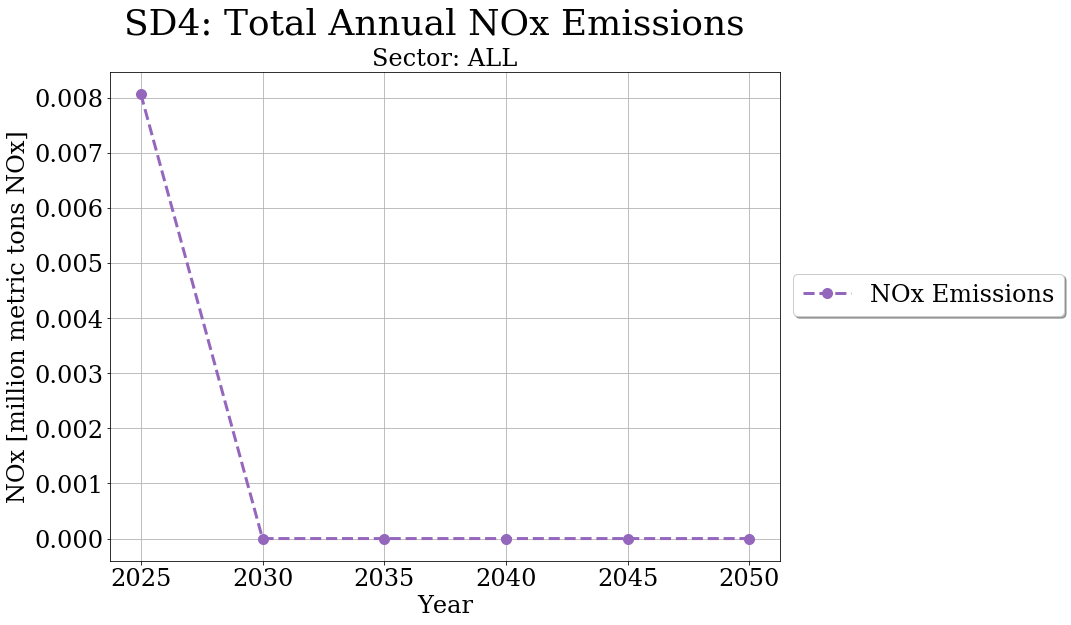

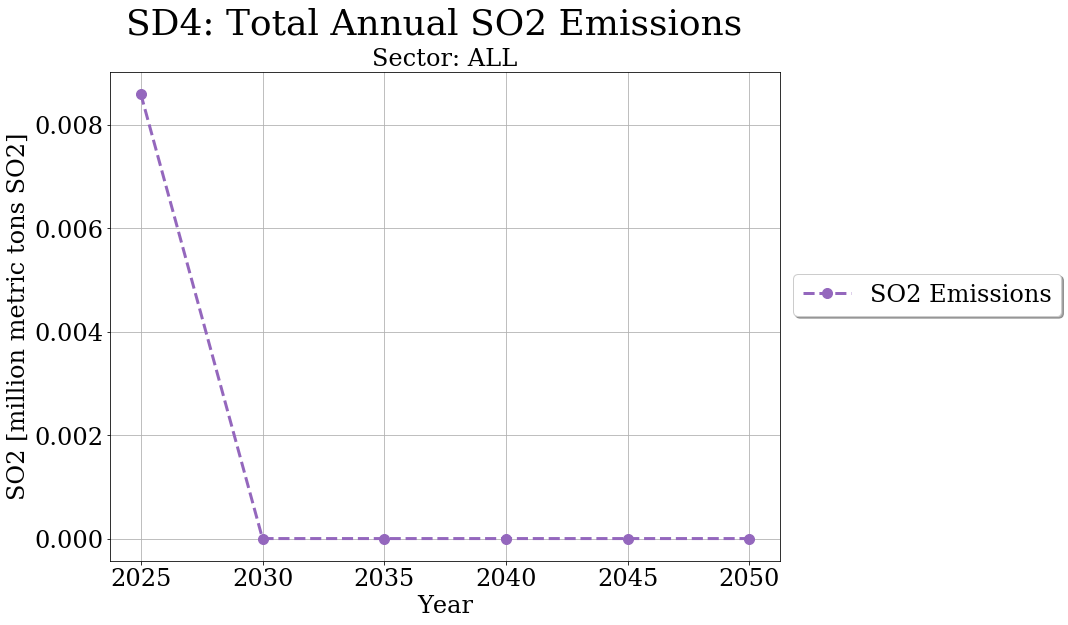

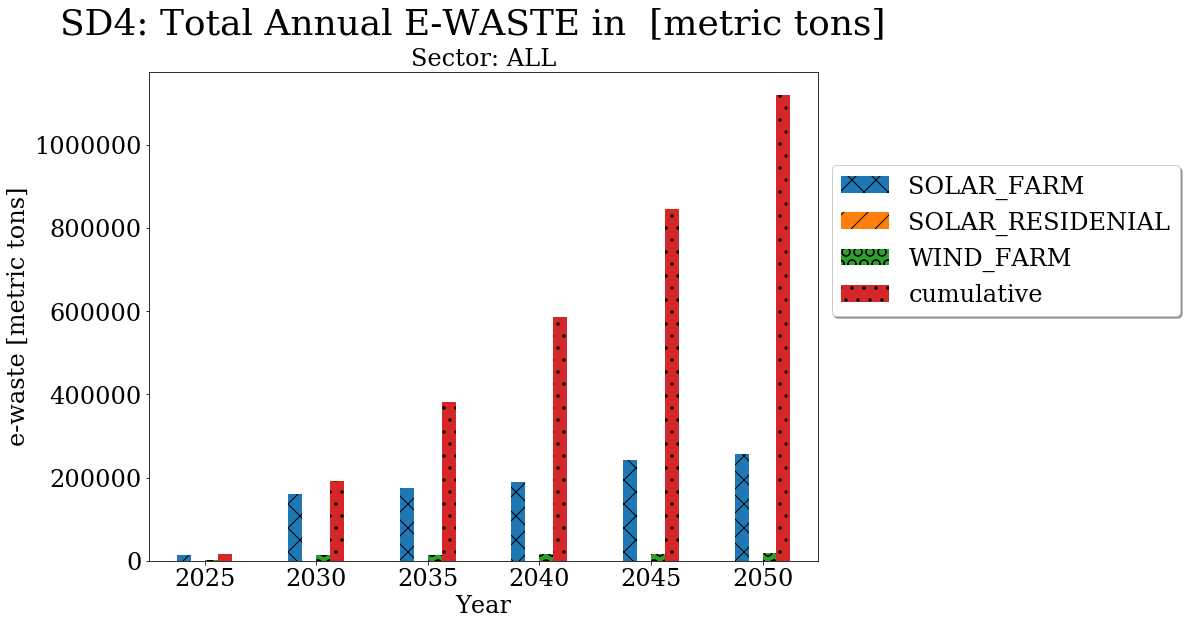

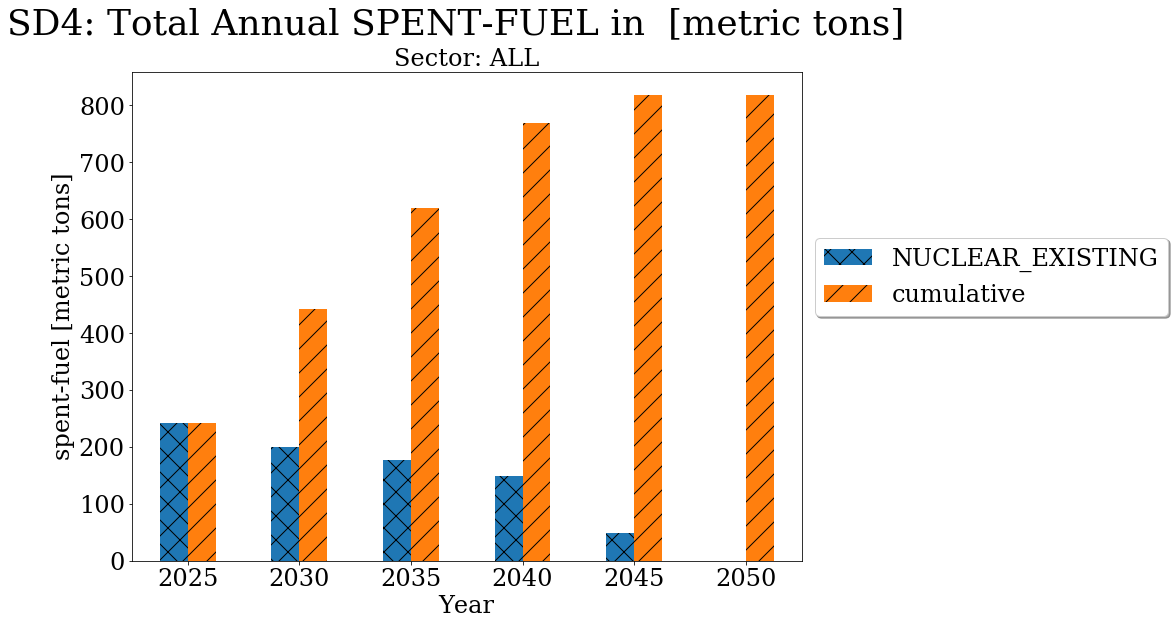

In [6]:
scenario = 'SD4'
scenario_list = [f for f in file_list if scenario in f]
sd4_dfs = make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False) 

## Scenario: SD5

* Nuclear plants shutdown at the end of their current license extensions.
* Zero carbon emissions allowed by 2030

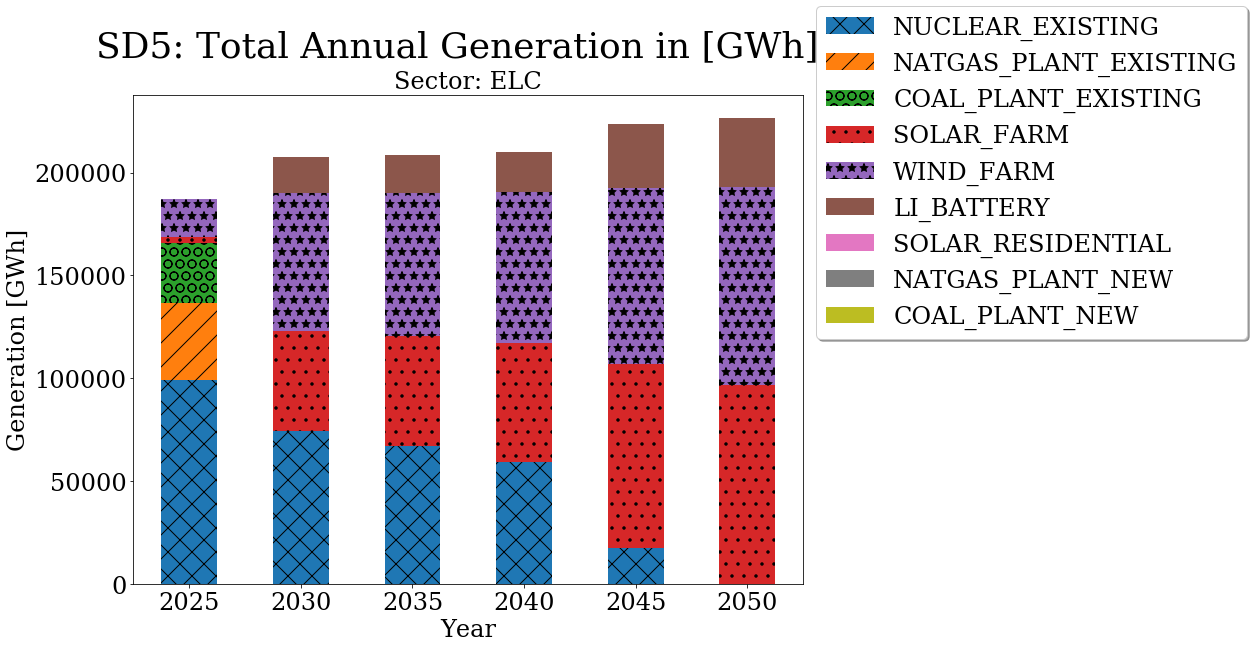

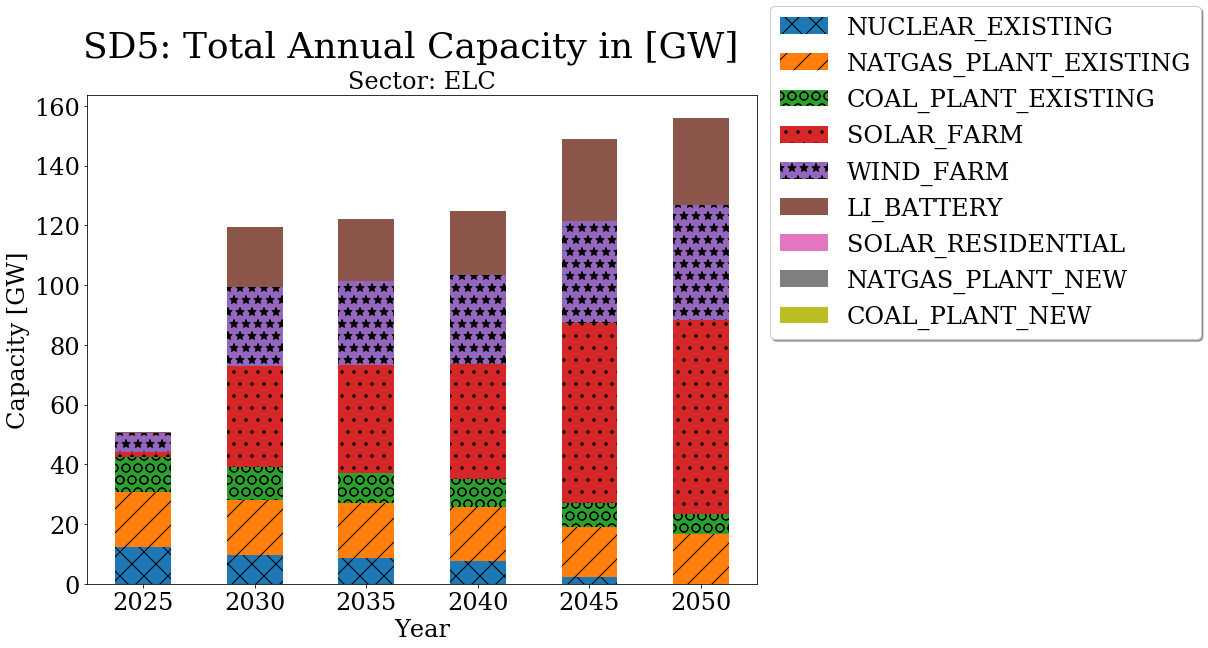

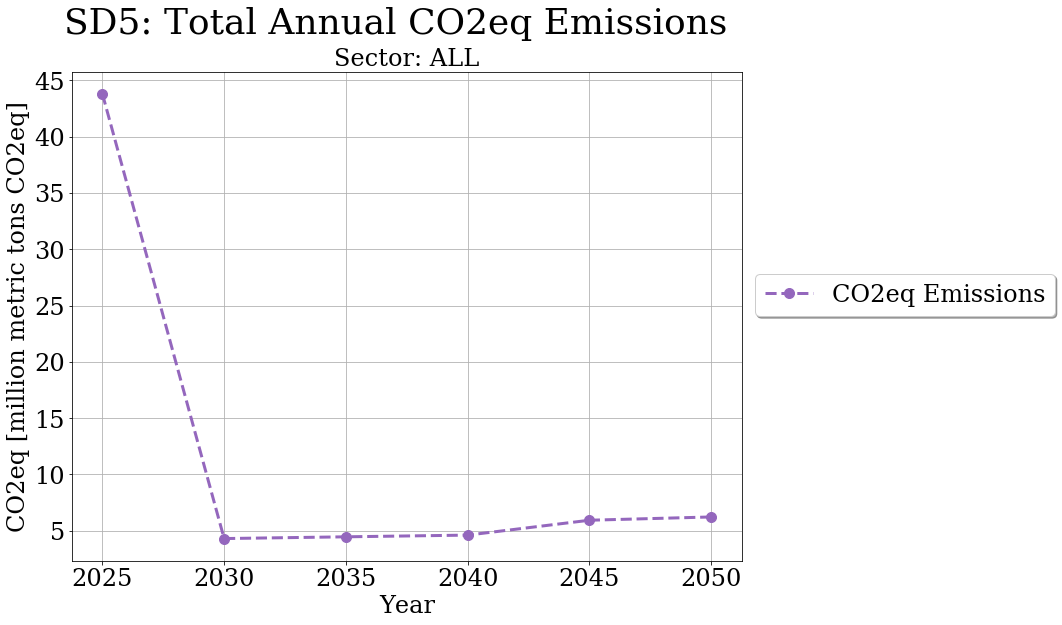

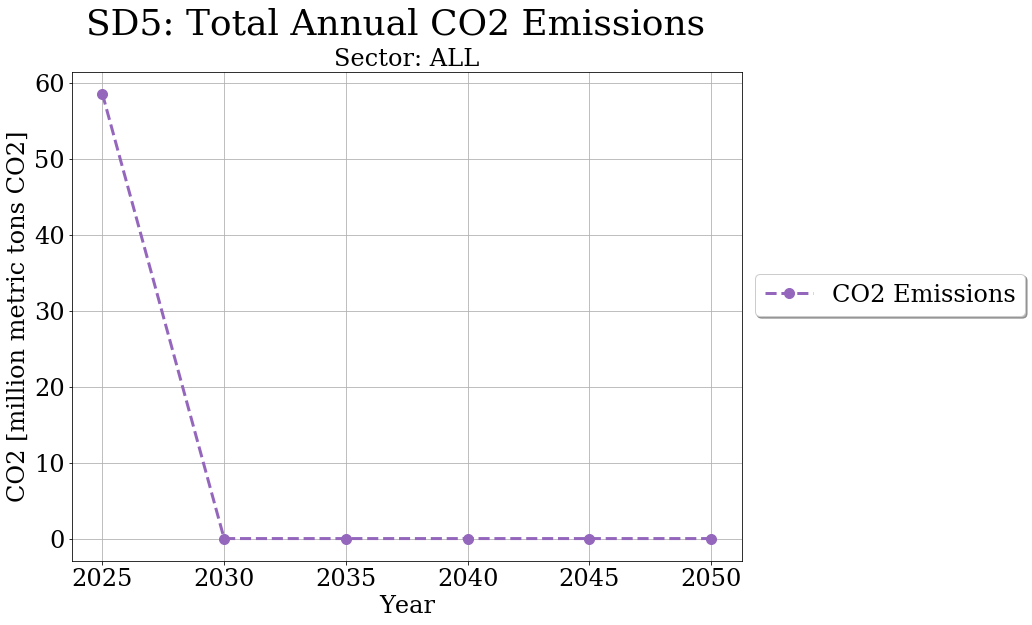

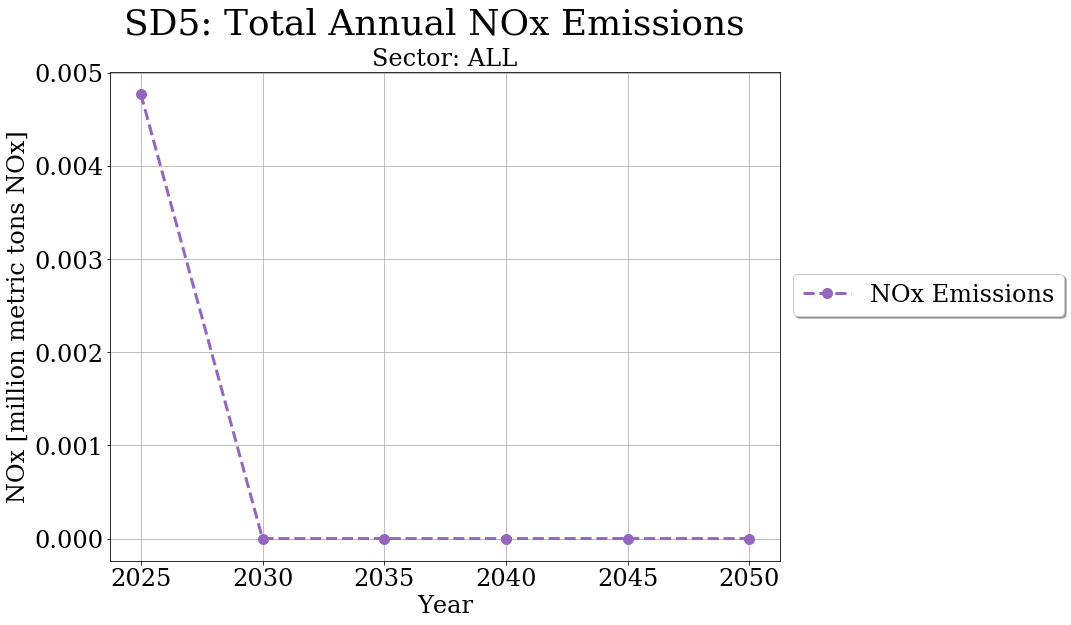

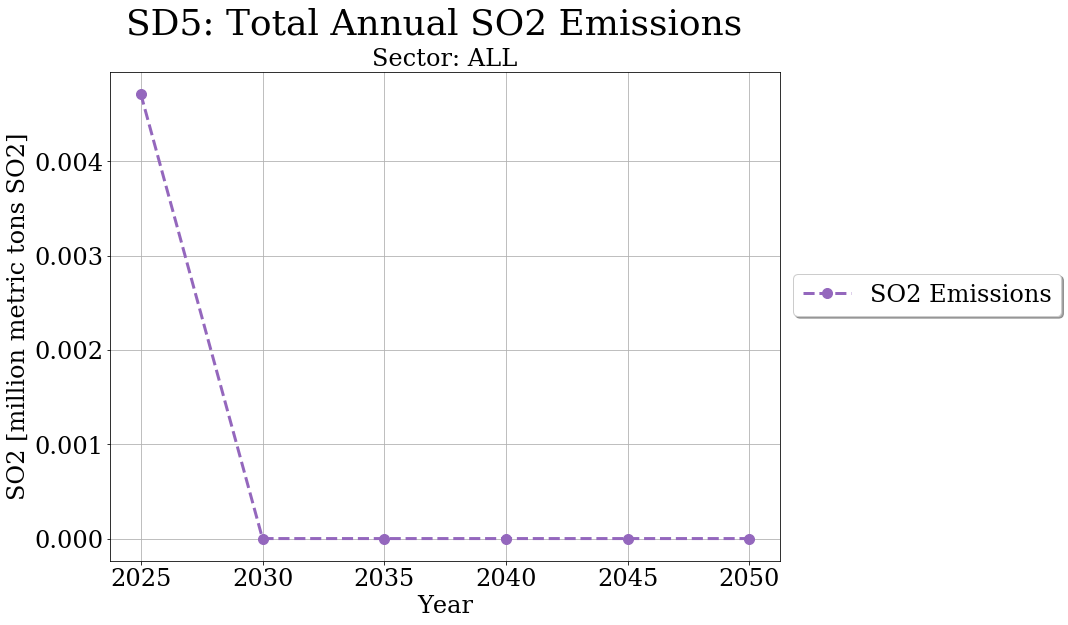

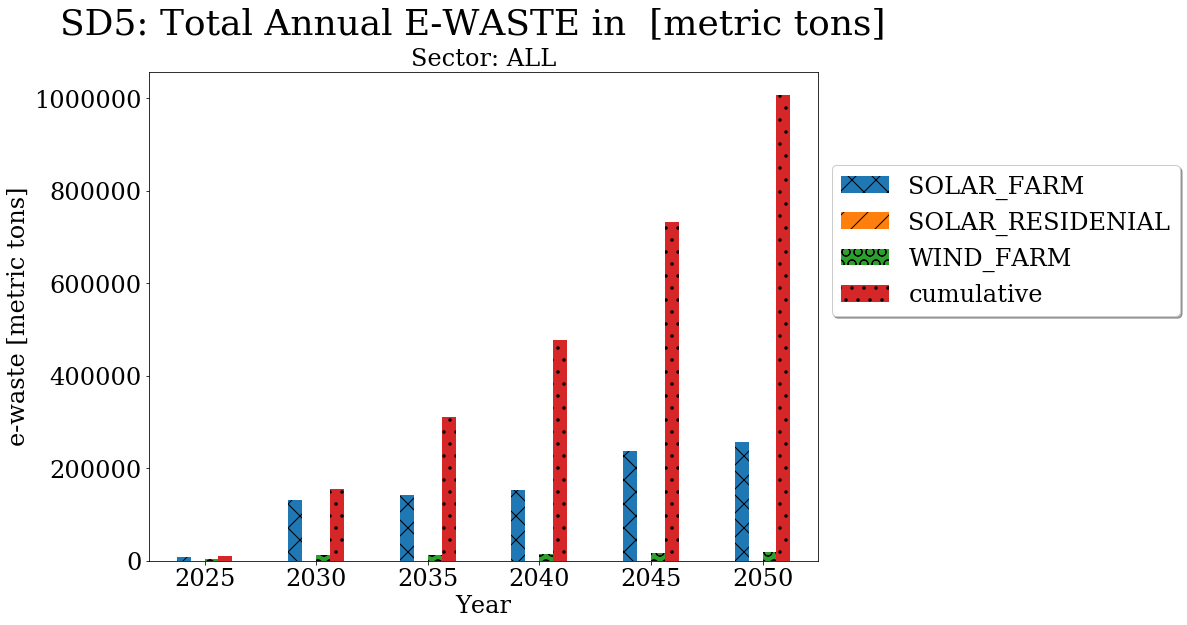

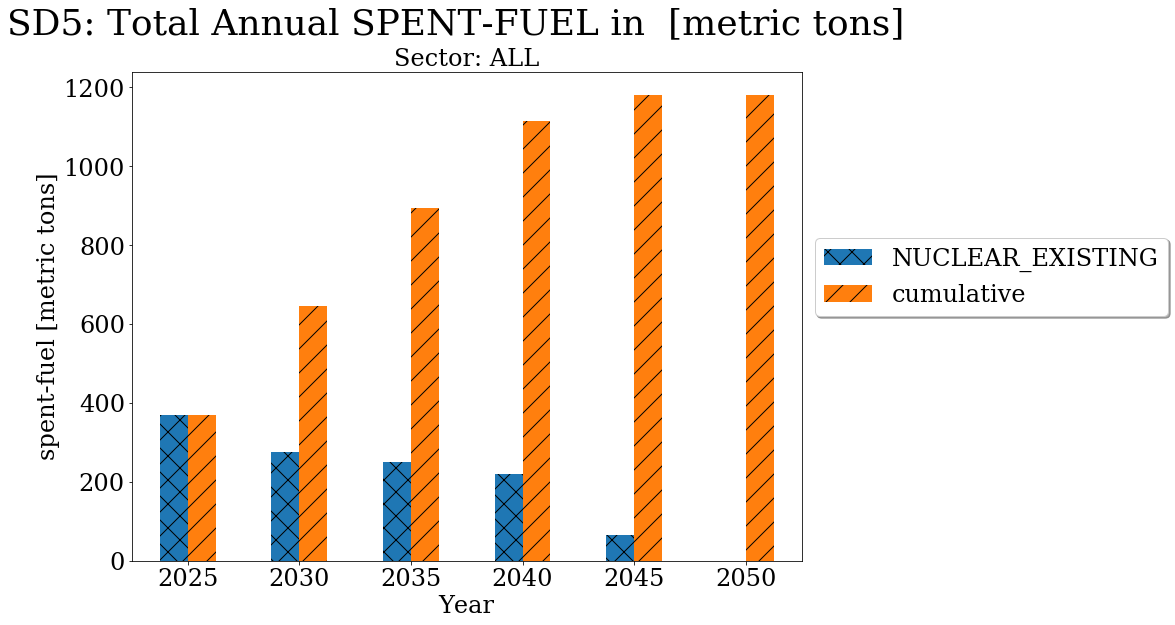

In [7]:
scenario = 'SD5'
scenario_list = [f for f in file_list if scenario in f]
sd5_dfs = make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False) 

## Scenario: SD6

* Nuclear plants remain open through 2050
* Zero carbon emissions allowed by 2030.

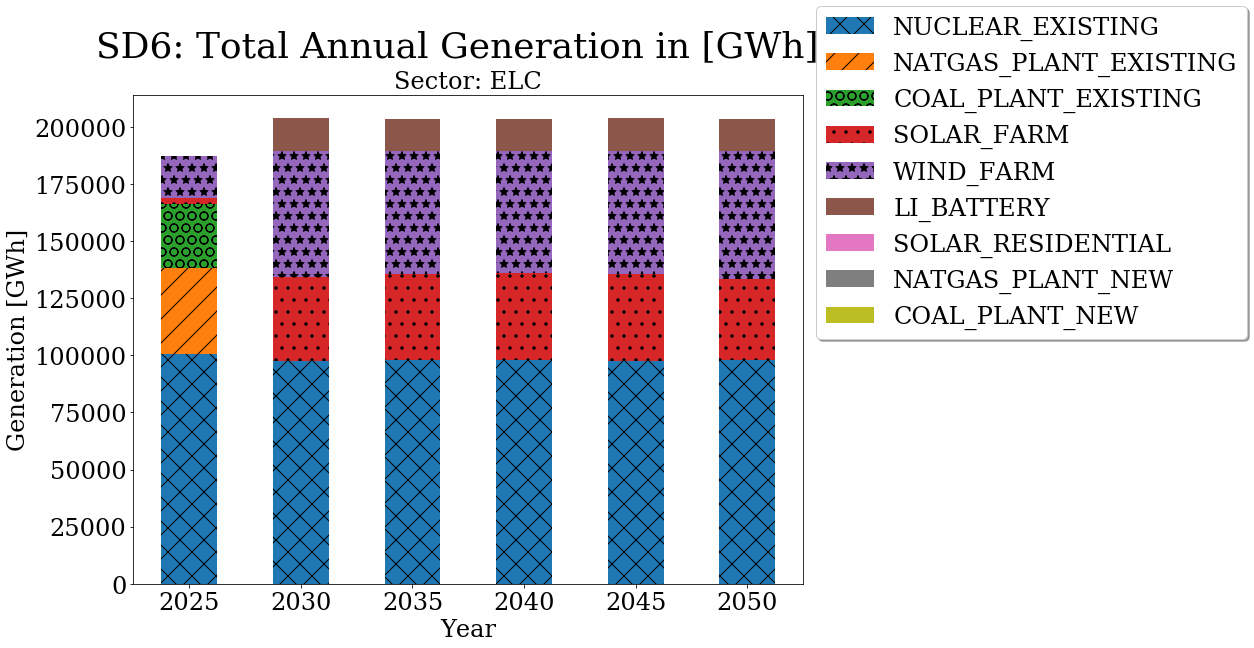

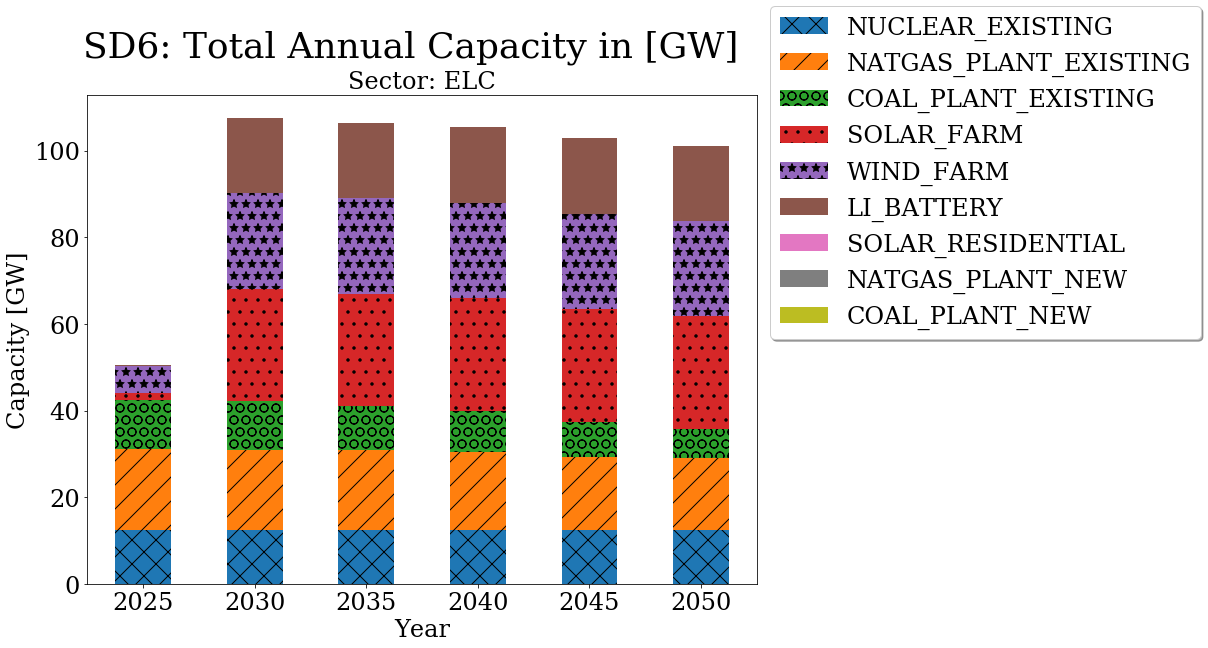

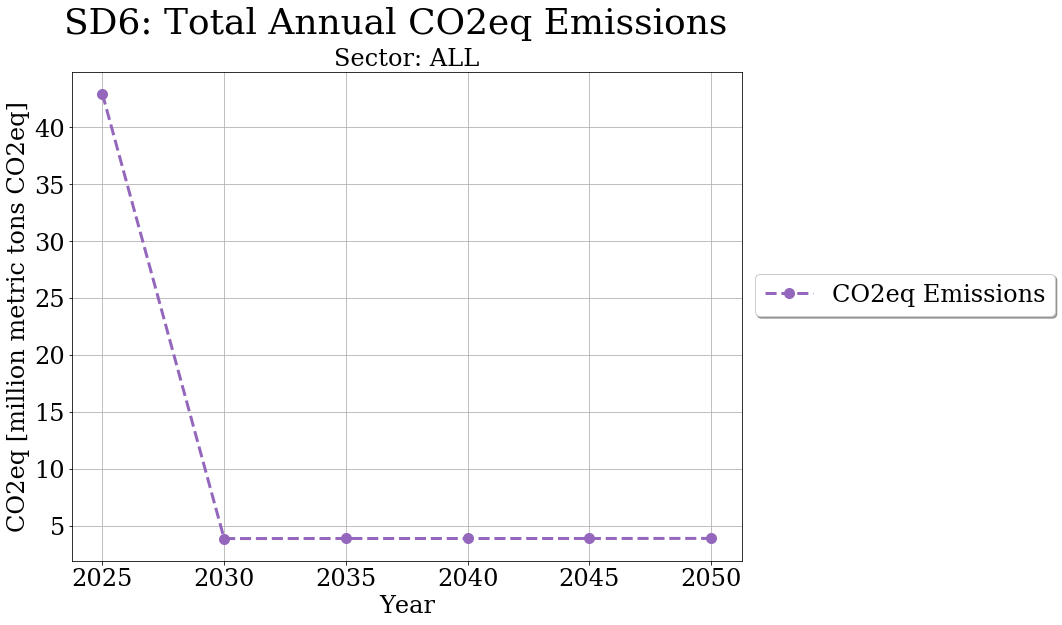

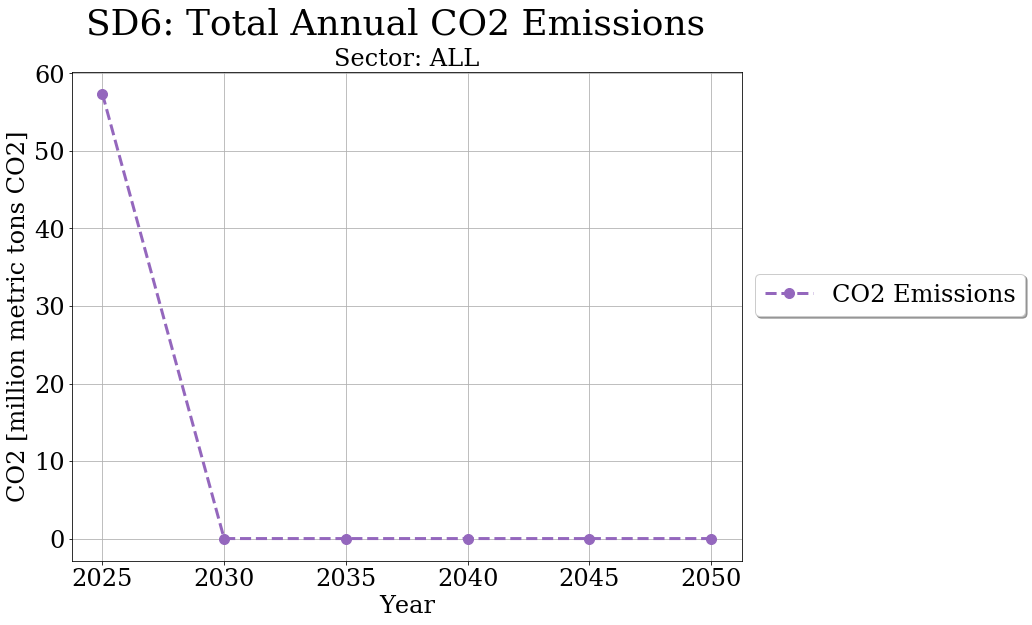

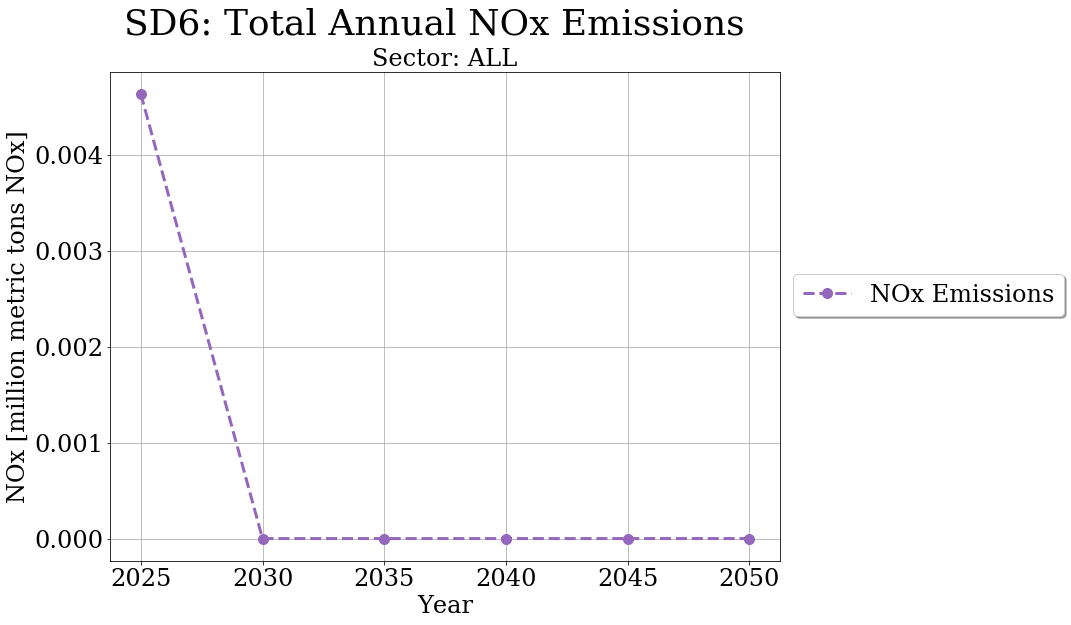

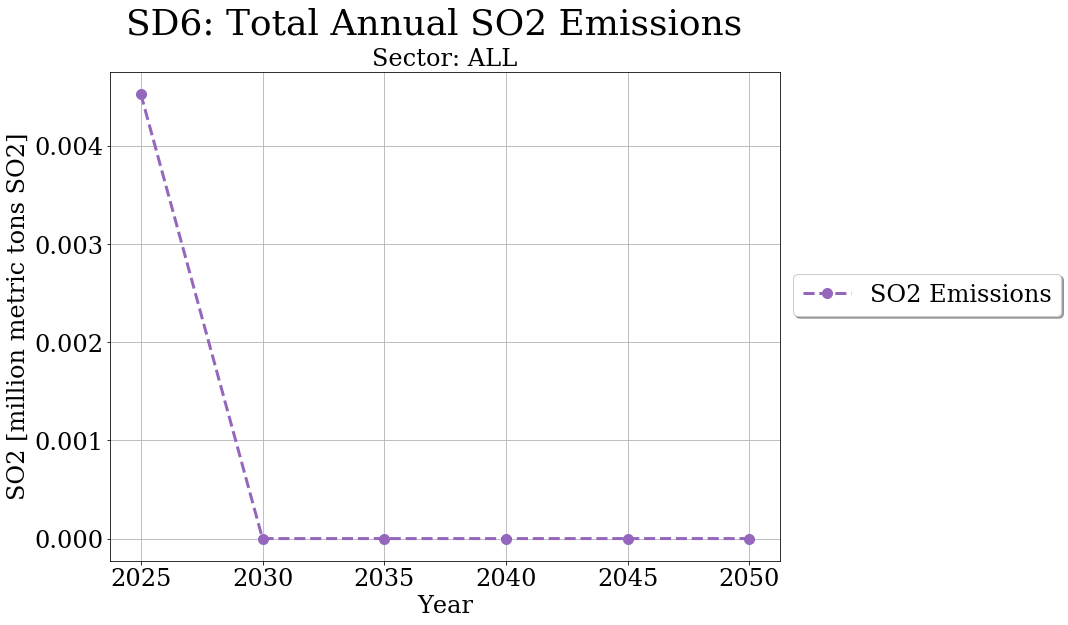

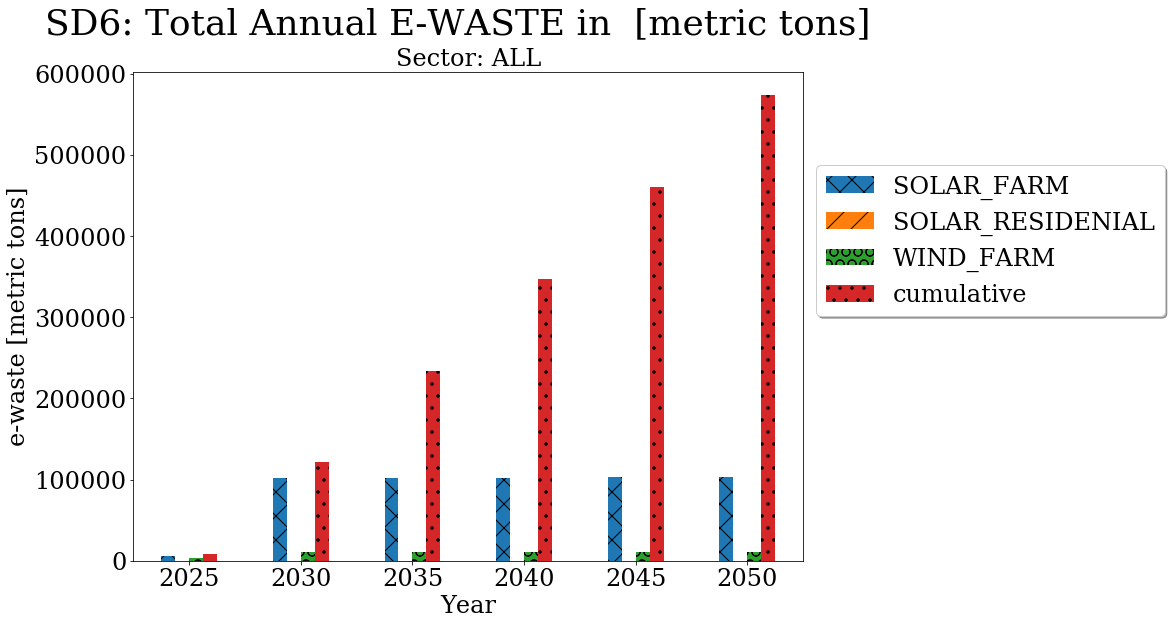

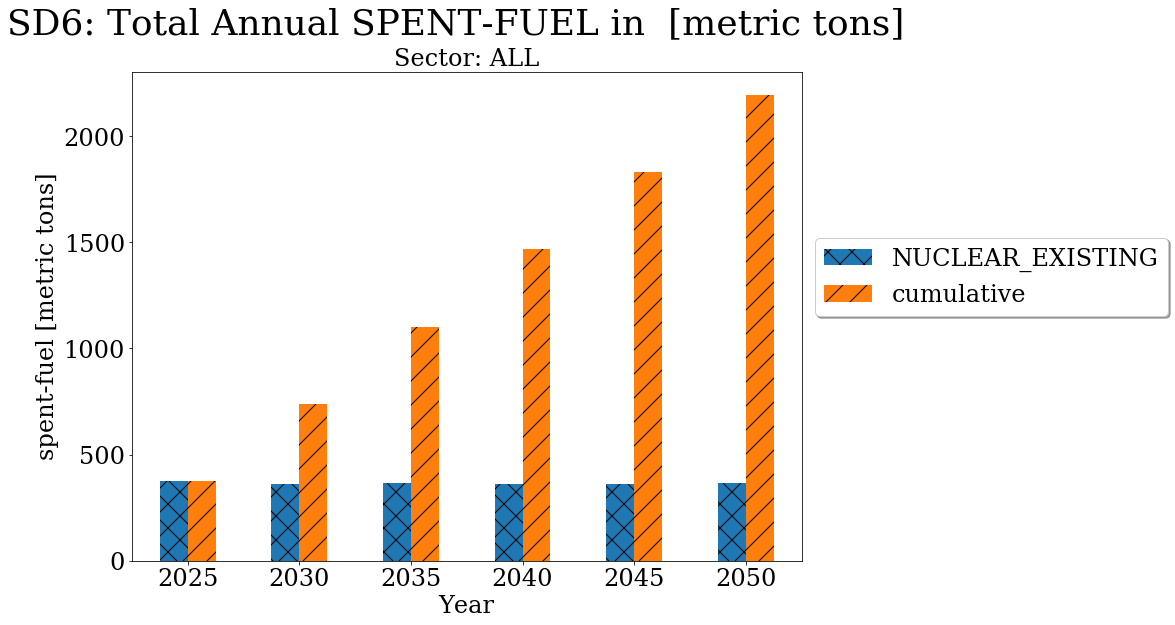

In [8]:
scenario = 'SD6'
scenario_list = [f for f in file_list if scenario in f]
sd5_dfs = make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False) 

In [9]:
def get_objective_value(file_list, scenarios=None):
    """
    This function retrieves the total cost objective functions
    for every scenario in the list of scenarios provided.

    Parameters
    ----------
    file_list : list
        The list of files with solution data.
    
    scenarios : list
        The list of scenarios considered.
        If None is given, all available log files will 
        be used.
        
    Returns
    -------
    objective_df : pandas dataframe
        A dataframe with all objectives.
    """
    
    # set up dictionary of scenarios
    objective_dict = {}

    for file in file_list: 
        datalines = parse_datalines(file)
        stop_at_line = 'Objective function value'
        scenario = get_scenario_name(file)
        objective_dict[scenario] = []
        for line in datalines:
            if stop_at_line in line:
                value_str = line.split()
                objective_dict[scenario].append(round(float(value_str[-1].strip("\'")),3))
                continue
    
    objective_df = pd.DataFrame(objective_dict)
    
    return objective_df    
#     return objective_dict

In [10]:
objectives = get_objective_value(file_list)
objectives

bau           SD2          SD3           SD4           SD5  \
0  3.085054e+07  3.745773e+07  46073034.19  6.120800e+07  6.430169e+07   

            SD6  
0  6.593724e+07

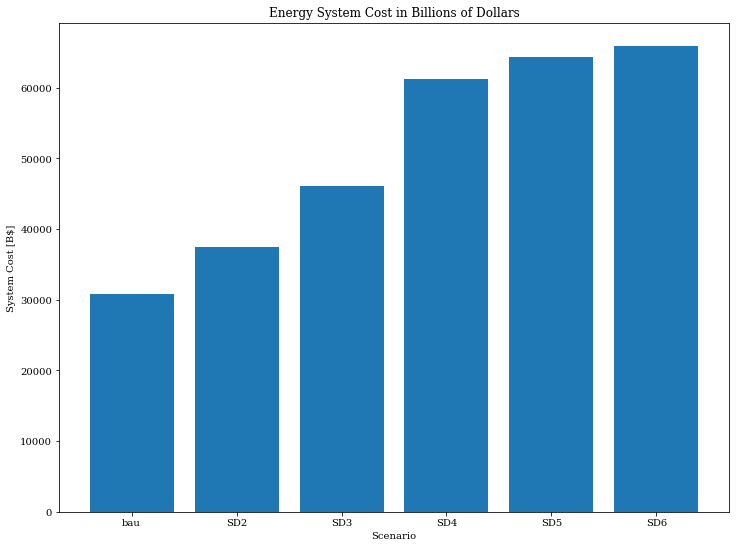

In [11]:
y = objectives.values.flatten()/1e3
x = np.array(objectives.keys())
plt.ylabel("System Cost [B$]")
plt.xlabel("Scenario")
plt.title("Energy System Cost in Billions of Dollars")
plt.bar(x, np.array(y))
plt.show()

In [73]:
def compare_emissions(file_list, emission,scenarios=None):
    """
    This function compares GHG emissions across scenarios.
    """
    emissions_dict = {}
    for file in file_list:
        scenario_name = get_scenario_name(file)
        datalines = parse_datalines(file)
        df = create_dataframe(datalines, 
                              variable='emissions', 
                              name=f'{emission}_compare',
                              sector='all',
                              emission=emission)
        emissions_dict[scenario_name] = np.array(df.total)
    
    emissions_df = pd.DataFrame(emissions_dict)
    
    return emissions_df

In [74]:
df = compare_emissions(file_list[:], emission='CO2eq')

In [75]:
df

bau         SD2        SD3        SD4        SD5        SD6
0   68.107592   45.081433  43.939308  67.339858  43.796642  42.940384
1   74.671252   61.642095  45.213556   4.743216   4.312350   3.861659
2   79.478072   70.032893  49.973347   4.947022   4.467861   3.868442
3   83.974681   74.562761  52.203519   5.186888   4.618650   3.867326
4   97.735771   95.853377  54.768514   5.997037   5.939270   3.868561
5  102.136682  102.136682  53.553266   6.230353   6.230354   3.875668

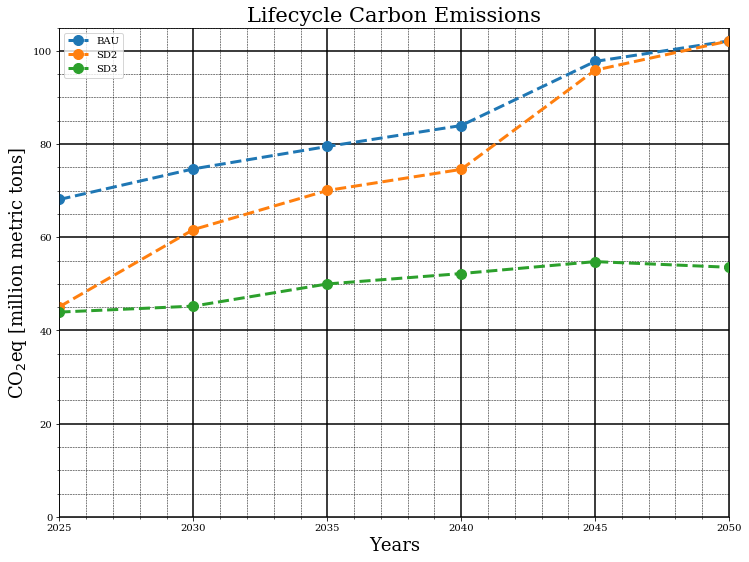

In [77]:
plt.figure(figsize=(12,9))
years = np.arange(2025,2051,5)
plt.plot(years, df['bau'], marker='o',lw=3, markersize=10, linestyle='--',label='BAU')
plt.plot(years, df['SD2'], marker='o',lw=3, markersize=10, linestyle='--',label='SD2')
plt.plot(years, df['SD3'], marker='o',lw=3, markersize=10, linestyle='--',label='SD3')
plt.minorticks_on()
plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.xlabel('Years', fontsize=18)
plt.ylabel(r'CO$_2$eq [million metric tons]', fontsize=18)
plt.title("Lifecycle Carbon Emissions", fontsize=21)
plt.ylim(0,105)
plt.xlim(2025,2050)
plt.legend()
plt.show()

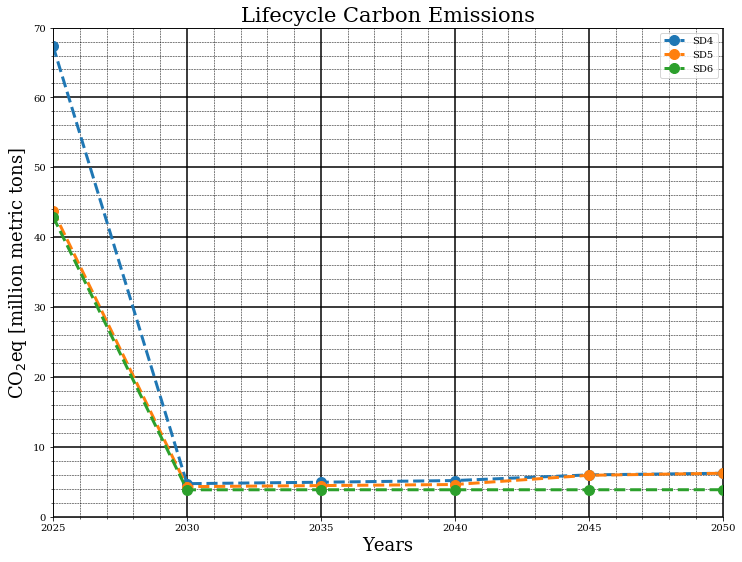

In [78]:
plt.figure(figsize=(12,9))
years = np.arange(2025,2051,5)
plt.plot(years, df['SD4'], marker='o',lw=3, markersize=10, linestyle='--',label='SD4')
plt.plot(years, df['SD5'], marker='o',lw=3, markersize=10, linestyle='--',label='SD5')
plt.plot(years, df['SD6'], marker='o',lw=3, markersize=10, linestyle='--',label='SD6')
plt.minorticks_on()
plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.xlabel('Years', fontsize=18)
plt.ylabel(r'CO$_2$eq [million metric tons]', fontsize=18)
plt.title("Lifecycle Carbon Emissions", fontsize=21)
plt.ylim(0,70)
plt.xlim(2025,2050)
plt.legend()
plt.show()

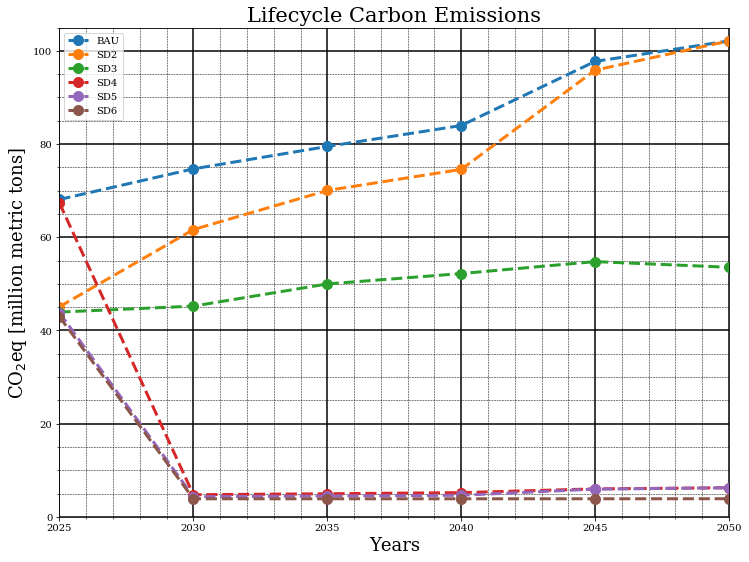

In [79]:
plt.figure(figsize=(12,9))
years = np.arange(2025,2051,5)
plt.plot(years, df['bau'], marker='o',lw=3, markersize=10, linestyle='--',label='BAU')
plt.plot(years, df['SD2'], marker='o',lw=3, markersize=10, linestyle='--',label='SD2')
plt.plot(years, df['SD3'], marker='o',lw=3, markersize=10, linestyle='--',label='SD3')
plt.plot(years, df['SD4'], marker='o',lw=3, markersize=10, linestyle='--',label='SD4')
plt.plot(years, df['SD5'], marker='o',lw=3, markersize=10, linestyle='--',label='SD5')
plt.plot(years, df['SD6'], marker='o',lw=3, markersize=10, linestyle='--',label='SD6')
plt.minorticks_on()
plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.xlabel('Years', fontsize=18)
plt.ylabel(r'CO$_2$eq [million metric tons]', fontsize=18)
plt.title("Lifecycle Carbon Emissions", fontsize=21)
plt.ylim(0,105)
plt.xlim(2025,2050)
plt.legend()
plt.show()

In [18]:
diff_carboncap1 = (df['SD4']-df['SD6']).sum()
diff_carboncap2 = (df['SD5']-df['SD6']).sum()
diff_carboncap3 = (df['SD4']-df['SD5']).sum()

print(f"Keeping the plants open until their scheduled closure avoids {round(diff_carboncap3,3)} million metric tons of CO2eq.")
print(f"Keeping the plants open through 2050 avoids {round(diff_carboncap1,3)} million metric tons of CO2eq.")
print(f"Not letting the plants close at all avoids {round(diff_carboncap2,3)} million metric tons more than letting them close at the scheduled time.")

Keeping the plants open until their scheduled closure avoids 25.079 million metric tons of CO2eq.
Keeping the plants open through 2050 avoids 32.162 million metric tons of CO2eq.
Not letting the plants close at all avoids 7.083 million metric tons more than letting them close at the scheduled time.


In [19]:
diff_nocarboncap1 = (df['bau']-df['SD3']).sum()
diff_nocarboncap2 = (df['bau']-df['SD2']).sum()
diff_nocarboncap3 = (df['SD2']-df['SD3']).sum()

print(f"Keeping the plants open until their scheduled closure avoids {round(diff_nocarboncap2,3)} million metric tons of CO2eq.")
print(f"Keeping the plants open through 2050 avoids {round(diff_nocarboncap1,3)} million metric tons of CO2eq.")
print(f"Not letting the plants close at all avoids {round(diff_nocarboncap3,3)} million metric tons more than letting them close at the scheduled time.")

Keeping the plants open until their scheduled closure avoids 56.795 million metric tons of CO2eq.
Keeping the plants open through 2050 avoids 206.453 million metric tons of CO2eq.
Not letting the plants close at all avoids 149.658 million metric tons more than letting them close at the scheduled time.


The EPA has a neat [calculator](https://www.epa.gov/energy/greenhouse-gas-equivalencies-calculator) to compare the equivalent carbon emissions.

Keeping all of the nuclear plants open until their licenses expires is the same as taking 36 million cars off the road for one year. Keeping them open until 2050 is equivalent to keeping a further 12 million cars off the road.

## Land Use Change in Illinois


1. Get the final capacity in 2050 of each generation type.
2. Calculate the required new land using the known power density of each type of generation.
3. Plot the land use change (bar plot?) in total area (square km) and as a percentage of Illinois area.

In [21]:
existing_cap = pd.DataFrame({'type':['wind', 'solar', 'natgas', 'coal', 'nuclear', 'storage'],
                'ex_cap_MW':[6325.9,116.3,18623.5,11564.0,12431.0, 137.0]})
existing_cap

type  ex_cap_MW
0     wind     6325.9
1    solar      116.3
2   natgas    18623.5
3     coal    11564.0
4  nuclear    12431.0
5  storage      137.0

There is insufficient data to evaluate the land use requirements for battery storage. Thus the land use requirements are likely underestimates in the renewables heavy scenarios.

In [91]:
power_density = pd.DataFrame({'type':['wind', 'solar', 'natgas', 'coal', 'nuclear', 'storage'],
                'power_density':[3.1,5.8,1283.9,126.6,288.9, 12376]})
power_density

type  power_density
0     wind            3.1
1    solar            5.8
2   natgas         1283.9
3     coal          126.6
4  nuclear          288.9
5  storage        12376.0

In [94]:
def get_final_capacity(file_list, scenarios=None):
    """
    This function retrieves the final capacity across 
    scenarios.
    """
    capacity_dict = {}
    for file in file_list:
        scenario_name = get_scenario_name(file)
        datalines = parse_datalines(file)
        df = create_dataframe(datalines, 
                              variable='capacity', 
                              name=f'final_capacity',
                              sector='elc',
                              emission=None)
        final_year = df.index[-1]
        df = df[df.index == final_year]
        data = np.array([df['WIND_FARM'].values[0],
                         df['SOLAR_FARM'].values[0],
                         df['NATGAS_PLANT_EXISTING'].values[0]+df['NATGAS_PLANT_NEW'].values[0],
                         df['COAL_PLANT_EXISTING'].values[0]+df['COAL_PLANT_NEW'].values[0],
                         df['NUCLEAR_EXISTING'].values[0],
                         df['LI_BATTERY'].values[0]])
        capacity_dict[scenario_name] = data
    
    capacity_df = pd.DataFrame(capacity_dict)
    
    return capacity_df 

In [95]:
capacity_df = get_final_capacity(file_list)
capacity_df

bau        SD2        SD3        SD4        SD5        SD6
0      0.000      0.000      0.000  38610.533  38610.533  21989.840
1      0.000      0.000      0.000  64863.108  64863.108  25967.887
2  47724.714  47724.714  26818.032  16621.900  16621.900  16621.900
3   6730.600   6730.600   6730.600   6730.600   6730.600   6730.600
4      0.000      0.000  12431.000      0.000      0.000  12431.000
5      0.000      0.000      0.000  29160.033  29160.033  17433.094

In [96]:
battenergy = 29160*4.87
battgeneration = 33733  # GWh

In [97]:
battenergy # MWh

142009.2

(0, 160)

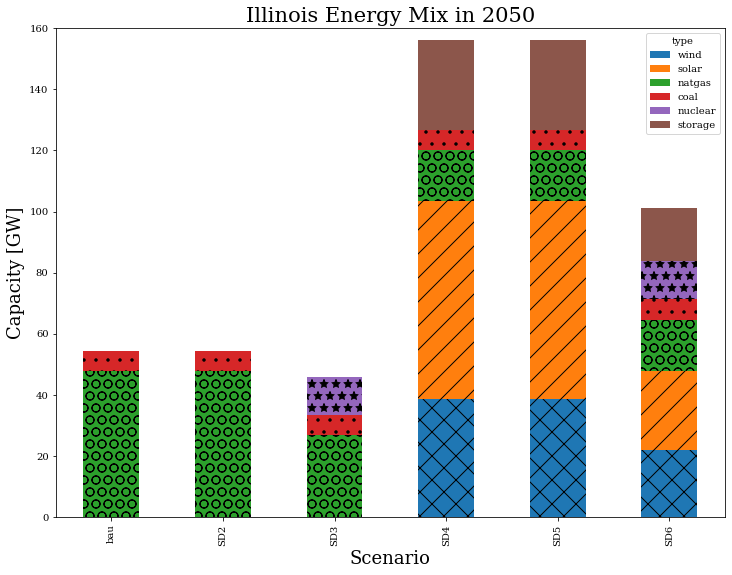

In [98]:
capacity_df.index = existing_cap.type
hatches = ''.join(h * len(df) for h in 'x/O.*')
ax = (capacity_df/1000).T.plot.bar(stacked=True)
bars = ax.patches
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.ylabel('Capacity [GW]', fontsize=18)
plt.title('Illinois Energy Mix in 2050', fontsize=21)
plt.xlabel('Scenario',fontsize=18)
plt.ylim(0,160)

In [99]:
capacity_df

bau        SD2        SD3        SD4        SD5        SD6
type                                                                     
wind         0.000      0.000      0.000  38610.533  38610.533  21989.840
solar        0.000      0.000      0.000  64863.108  64863.108  25967.887
natgas   47724.714  47724.714  26818.032  16621.900  16621.900  16621.900
coal      6730.600   6730.600   6730.600   6730.600   6730.600   6730.600
nuclear      0.000      0.000  12431.000      0.000      0.000  12431.000
storage      0.000      0.000      0.000  29160.033  29160.033  17433.094

In [100]:
landUse_req = capacity_df.divide(np.array(power_density.power_density).T, axis='rows')
landUse_req

bau        SD2        SD3           SD4           SD5  \
type                                                                   
wind      0.000000   0.000000   0.000000  12455.010645  12455.010645   
solar     0.000000   0.000000   0.000000  11183.294483  11183.294483   
natgas   37.171675  37.171675  20.887945     12.946413     12.946413   
coal     53.164297  53.164297  53.164297     53.164297     53.164297   
nuclear   0.000000   0.000000  43.028730      0.000000      0.000000   
storage   0.000000   0.000000   0.000000      2.356176      2.356176   

                 SD6  
type                  
wind     7093.496774  
solar    4477.221897  
natgas     12.946413  
coal       53.164297  
nuclear    43.028730  
storage     1.408621

(0, 25000)

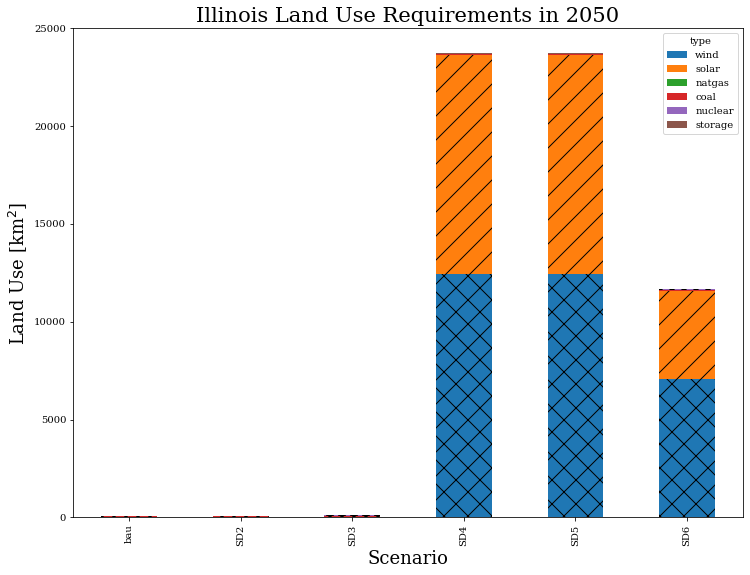

In [101]:
hatches = ''.join(h * len(df) for h in 'x/O.*')
ax = landUse_req.T.plot.bar(stacked=True)
bars = ax.patches
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.ylabel(r'Land Use [km$^2$]', fontsize=18)
plt.title('Illinois Land Use Requirements in 2050', fontsize=21)
plt.xlabel('Scenario',fontsize=18)
plt.ylim(0,25000)

(0, 16)

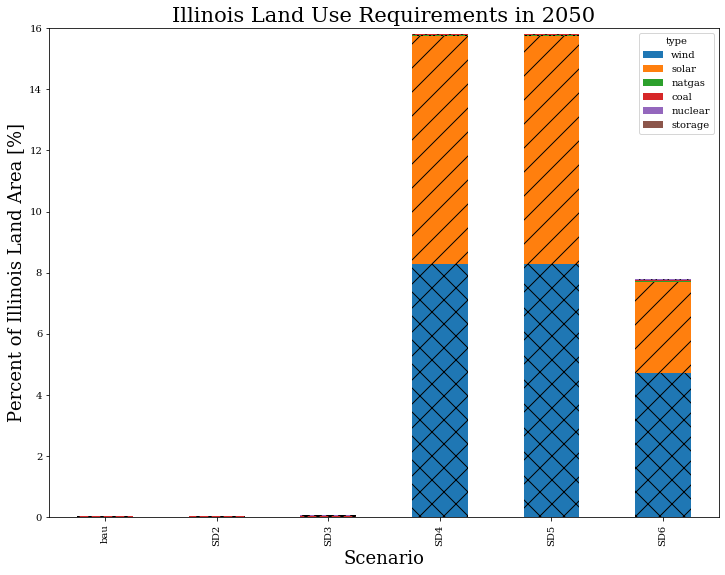

In [102]:
illinois_area = 149999.16
hatches = ''.join(h * len(df) for h in 'x/O.*')
ax2 = (landUse_req/illinois_area*100).T.plot.bar(stacked=True)
bars = ax2.patches
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.ylabel(r'Percent of Illinois Land Area [%]', fontsize=18)
plt.title('Illinois Land Use Requirements in 2050', fontsize=21)
plt.xlabel('Scenario',fontsize=18)
plt.ylim(0,16)